# Dataset
The following categorical variables have been encoded into numberic ordinal scale:

- Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

- RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

# Libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data


In [93]:
#Read CSV
df = pd.read_csv('hr_attrition_data.csv')
# Add colums with categorical variables for visualization
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Education_label'] = df['Education'].map({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df['EnvironmentSatisfaction_label'] = df['EnvironmentSatisfaction'].map({ 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobInvolvement_label'] = df['JobInvolvement'].map({1 : 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobSatisfaction_label'] = df['JobSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['PerformanceRating_label'] = df['PerformanceRating'].map({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
df['RelationshipSatisfaction_label'] = df['RelationshipSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['WorkLifeBalance_label'] = df['WorkLifeBalance'].map({1:'Bad',2:'Good', 3: 'Better', 4: 'Best'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             1470 non-null   int64 
 1   Attrition                       1470 non-null   object
 2   BusinessTravel                  1470 non-null   object
 3   DailyRate                       1470 non-null   int64 
 4   Department                      1470 non-null   object
 5   DistanceFromHome                1470 non-null   int64 
 6   Education                       1470 non-null   int64 
 7   EducationField                  1470 non-null   object
 8   EmployeeCount                   1470 non-null   int64 
 9   EmployeeNumber                  1470 non-null   int64 
 10  EnvironmentSatisfaction         1470 non-null   int64 
 11  Gender                          1470 non-null   object
 12  HourlyRate                      1470 non-null   

In [94]:
#Show first 5 data entries
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Flag,Education_label,EnvironmentSatisfaction_label,JobInvolvement_label,JobSatisfaction_label,PerformanceRating_label,RelationshipSatisfaction_label,WorkLifeBalance_label
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,5,1,College,Medium,High,Very High,Excellent,Low,Bad
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,7,0,Below College,High,Medium,Medium,Outstanding,Very High,Better
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,1,College,Very High,Medium,High,Excellent,Medium,Better
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,0,Master,Very High,High,High,Excellent,High,Better
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,0,Below College,Low,High,Medium,Excellent,Very High,Better


In [95]:
# Find duplicate rows based EmployeeCount, Over18 and StandardHours
duplicate = df[df.duplicated(['EmployeeCount', 'Over18', 'StandardHours'])]
print("Duplicate Rows based on EmployeeCount, Over18, StandardHours :")
duplicate[['EmployeeCount', 'Over18', 'StandardHours']].head(5)
 

Duplicate Rows based on EmployeeCount, Over18, StandardHours :


,EmployeeCount,Over18,StandardHours
1,1,Y,80
2,1,Y,80
3,1,Y,80
4,1,Y,80
5,1,Y,80


In [96]:
# Count duplicate rows based EmployeeCount, Over18 and StandardHours
print("Duplicate Rows:")
duplicate[['EmployeeCount', 'Over18', 'StandardHours']].shape[0]

Duplicate Rows:


1469

# Preprocessing

In [97]:
# Remove columns with duplicated rows
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [98]:
df.dtypes

Age                                int64
Attrition                         object
BusinessTravel                    object
DailyRate                          int64
Department                        object
DistanceFromHome                   int64
Education                          int64
EducationField                    object
EnvironmentSatisfaction            int64
Gender                            object
HourlyRate                         int64
JobInvolvement                     int64
JobLevel                           int64
JobRole                           object
JobSatisfaction                    int64
MaritalStatus                     object
MonthlyIncome                      int64
MonthlyRate                        int64
NumCompaniesWorked                 int64
OverTime                          object
PercentSalaryHike                  int64
PerformanceRating                  int64
RelationshipSatisfaction           int64
StockOptionLevel                   int64
TotalWorkingYear

# Attrition Calculations

## Analyze and Visualize a single categorical variable

In [99]:
# Analyze Attration by Education Level
attrition_df = df[df['Attrition_Flag'] == True].copy()

# Calculate the percentage of attrition for each education level
attrition_by_education = attrition_df.groupby('Education_label').size().reset_index(name='AttritionCount')

# Calculate the total number of attritions
total_attrition = attrition_by_education['AttritionCount'].sum()

# Calculate the percentage for each education level
attrition_by_education['AttritionPercentage'] = (attrition_by_education['AttritionCount'] / total_attrition) * 100
attrition_by_education = attrition_by_education.sort_values(ascending=False, by= 'AttritionPercentage')
attrition_by_education


,Education_label,AttritionCount,AttritionPercentage
0,Bachelor,99,41.772152
4,Master,58,24.472574
2,College,44,18.565401
1,Below College,31,13.080169
3,Doctor,5,2.109705


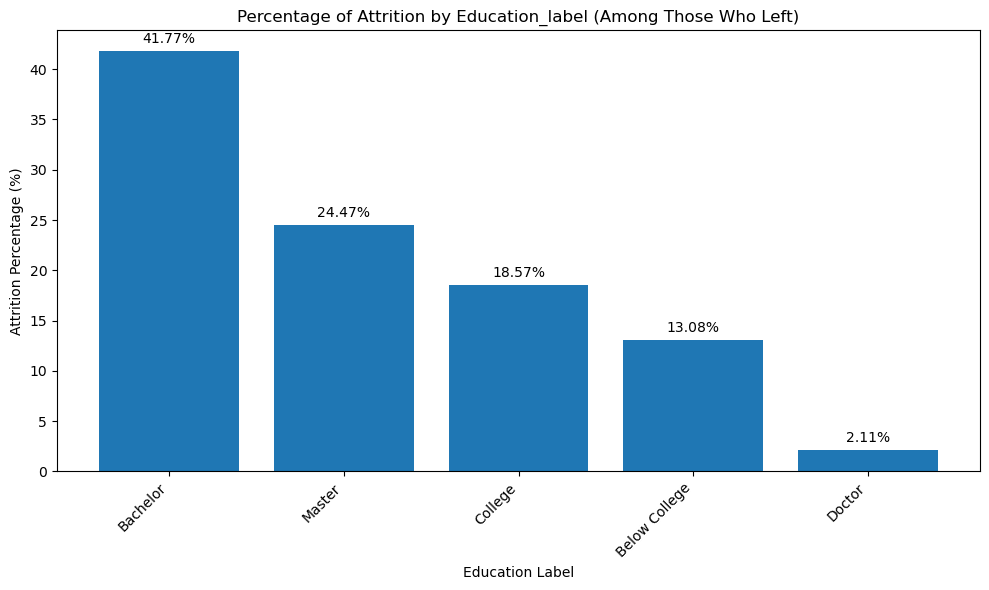

In [100]:
# Create the barplot for attrition_by_education

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(attrition_by_education['Education_label'], attrition_by_education['AttritionPercentage'])
plt.title(f'Percentage of Attrition by {'Education_label'} (Among Those Who Left)')
plt.xlabel('Education_label'.replace('_', ' ').title())
plt.ylabel('Attrition Percentage (%)')

# Add percentage values above the bars
for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [101]:
# Analyze Attrition by Education and Gender
attrition_by_education_gender = df.groupby(['Education_label', 'Gender', 'Attrition']).size().reset_index(name='AttritionCount')
# Calculate the total number of attritions
total_attrition = attrition_by_education_gender['AttritionCount'].sum()

# Calculate the percentage for each education level
attrition_by_education_gender['AttritionPercentage'] = (attrition_by_education_gender['AttritionCount'] / total_attrition) * 100
attrition_by_education_gender = attrition_by_education_gender.sort_values(ascending=False, by= 'AttritionPercentage')
attrition_by_education_gender

,Education_label,Gender,Attrition,AttritionCount,AttritionPercentage
2,Bachelor,Male,No,276,18.775510
18,Master,Male,No,202,13.741497
0,Bachelor,Female,No,197,13.401361
10,College,Male,No,140,9.523810
16,Master,Female,No,138,9.387755
8,College,Female,No,98,6.666667
6,Below College,Male,No,90,6.122449
3,Bachelor,Male,Yes,61,4.149660
4,Below College,Female,No,49,3.333333
19,Master,Male,Yes,42,2.857143


<Figure size 1400x600 with 0 Axes>

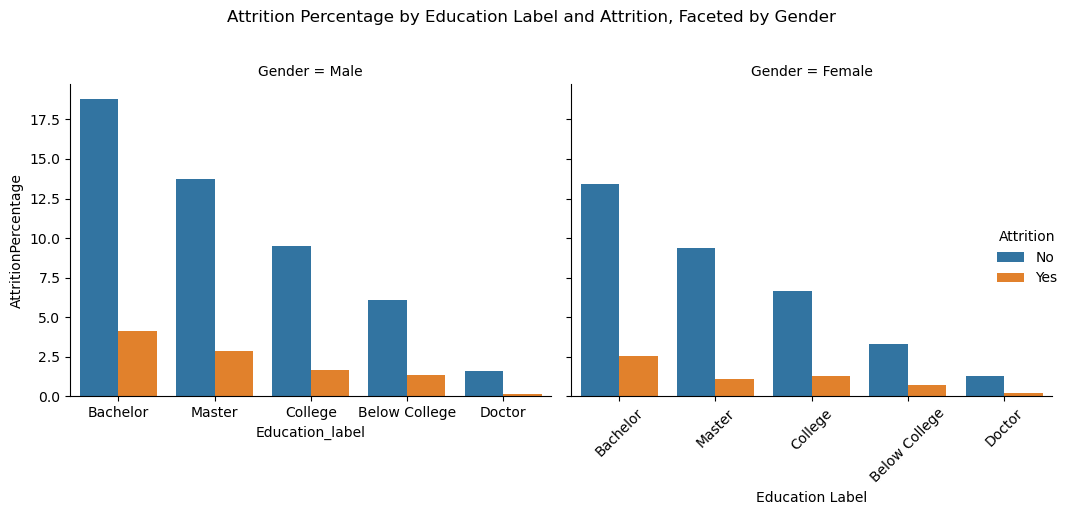

In [102]:
# Crate Barplot by Education and Gender
plt.figure(figsize=(14, 6))
sns.catplot(x='Education_label', y='AttritionPercentage', hue='Attrition', col='Gender',data=attrition_by_education_gender, kind='bar', col_wrap=2)
plt.suptitle(f'Attrition Percentage by {'Education_label'.replace("_", " ").title()} and {'Attrition'.replace("_", " ").title()}, Faceted by {'Gender'.replace("_", " ").title()}', y=1.02)
plt.xlabel('Education_label'.replace('_', ' ').title())
plt.ylabel('Attrition Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze multiple categorical variables by creating functions


--- Attrition Analysis by BusinessTravel, Gender, and Attrition ---
       BusinessTravel  Gender Attrition  AttritionCount  AttritionPercentage
10      Travel_Rarely    Male        No             519            35.306122
8       Travel_Rarely  Female        No             368            25.034014
6   Travel_Frequently    Male        No             121             8.231293
11      Travel_Rarely    Male       Yes             102             6.938776
2          Non-Travel    Male        No              92             6.258503
4   Travel_Frequently  Female        No              87             5.918367
9       Travel_Rarely  Female       Yes              54             3.673469
0          Non-Travel  Female        No              46             3.129252
7   Travel_Frequently    Male       Yes              39             2.653061
5   Travel_Frequently  Female       Yes              30             2.040816
3          Non-Travel    Male       Yes               9             0.612245
1      

<Figure size 1400x600 with 0 Axes>

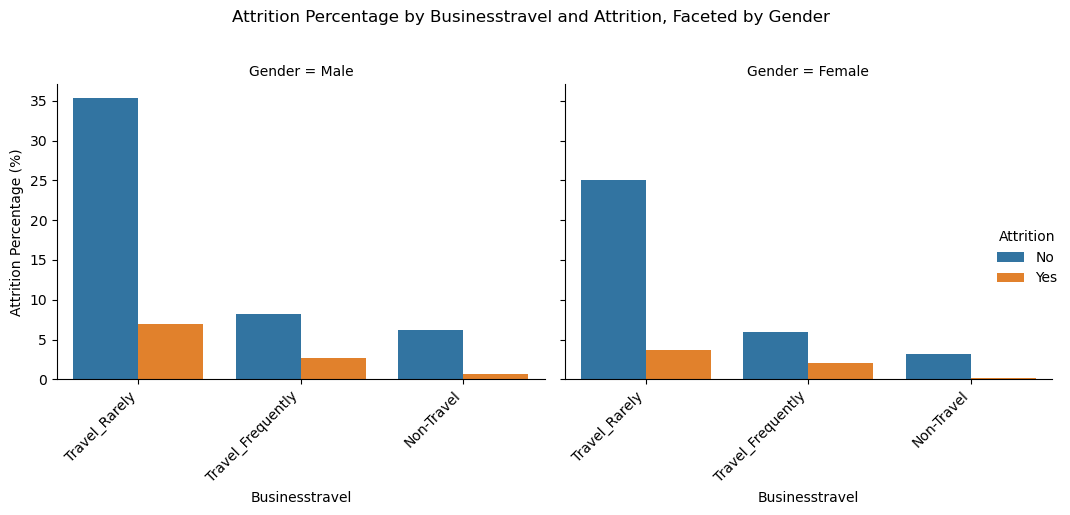


--- Attrition Analysis by Department, Gender, and Attrition ---
                Department  Gender Attrition  AttritionCount  \
6   Research & Development    Male        No             492   
4   Research & Development  Female        No             336   
10                   Sales    Male        No             203   
8                    Sales  Female        No             151   
7   Research & Development    Male       Yes              90   
11                   Sales    Male       Yes              54   
5   Research & Development  Female       Yes              43   
9                    Sales  Female       Yes              38   
2          Human Resources    Male        No              37   
0          Human Resources  Female        No              14   
3          Human Resources    Male       Yes               6   
1          Human Resources  Female       Yes               6   

    AttritionPercentage  
6             33.469388  
4             22.857143  
10            13.809524 

<Figure size 1400x600 with 0 Axes>

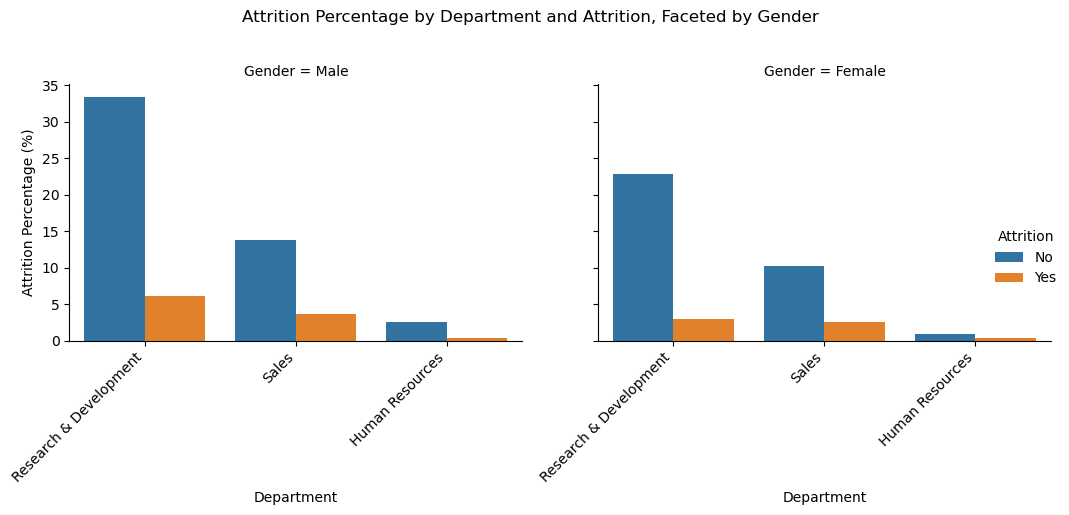


--- Attrition Analysis by EducationField, Gender, and Attrition ---
      EducationField  Gender Attrition  AttritionCount  AttritionPercentage
6      Life Sciences    Male        No             315            21.428571
14           Medical    Male        No             230            15.646259
4      Life Sciences  Female        No             202            13.741497
12           Medical  Female        No             171            11.632653
10         Marketing    Male        No              70             4.761905
22  Technical Degree    Male        No              58             3.945578
8          Marketing  Female        No              54             3.673469
7      Life Sciences    Male       Yes              51             3.469388
18             Other    Male        No              44             2.993197
15           Medical    Male       Yes              44             2.993197
20  Technical Degree  Female        No              42             2.857143
5      Life Science

<Figure size 1400x600 with 0 Axes>

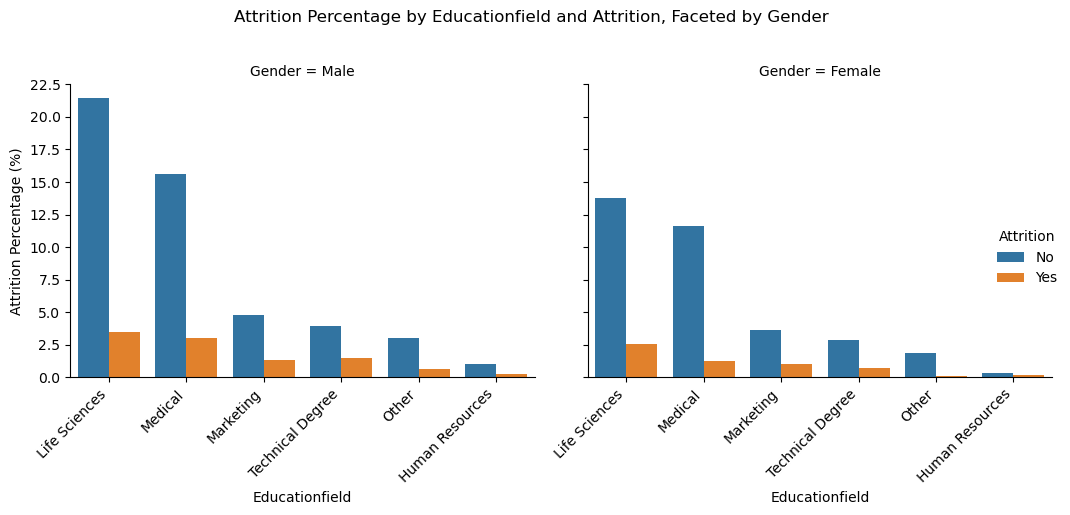


--- Attrition Analysis by JobRole, Gender, and Attrition ---
                      JobRole  Gender Attrition  AttritionCount  \
30            Sales Executive    Male        No             157   
26         Research Scientist    Male        No             148   
10      Laboratory Technician    Male        No             128   
28            Sales Executive  Female        No             112   
24         Research Scientist  Female        No              97   
2   Healthcare Representative    Male        No              76   
8       Laboratory Technician  Female        No              69   
16     Manufacturing Director  Female        No              68   
18     Manufacturing Director    Male        No              67   
14                    Manager    Male        No              52   
0   Healthcare Representative  Female        No              46   
11      Laboratory Technician    Male       Yes              46   
22          Research Director    Male        No              46   


<Figure size 1400x600 with 0 Axes>

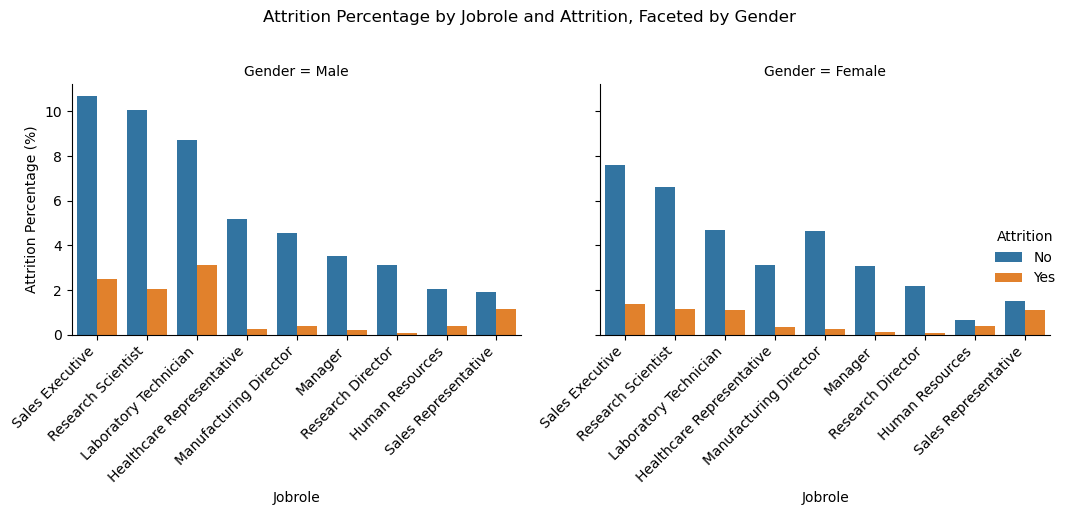


--- Attrition Analysis by MaritalStatus, Gender, and Attrition ---
   MaritalStatus  Gender Attrition  AttritionCount  AttritionPercentage
6        Married    Male        No             348            23.673469
4        Married  Female        No             241            16.394558
10        Single    Male        No             198            13.469388
2       Divorced    Male        No             186            12.653061
8         Single  Female        No             152            10.340136
0       Divorced  Female        No             108             7.346939
11        Single    Male       Yes              73             4.965986
7        Married    Male       Yes              53             3.605442
9         Single  Female       Yes              47             3.197279
5        Married  Female       Yes              31             2.108844
3       Divorced    Male       Yes              24             1.632653
1       Divorced  Female       Yes               9             0.612

<Figure size 1400x600 with 0 Axes>

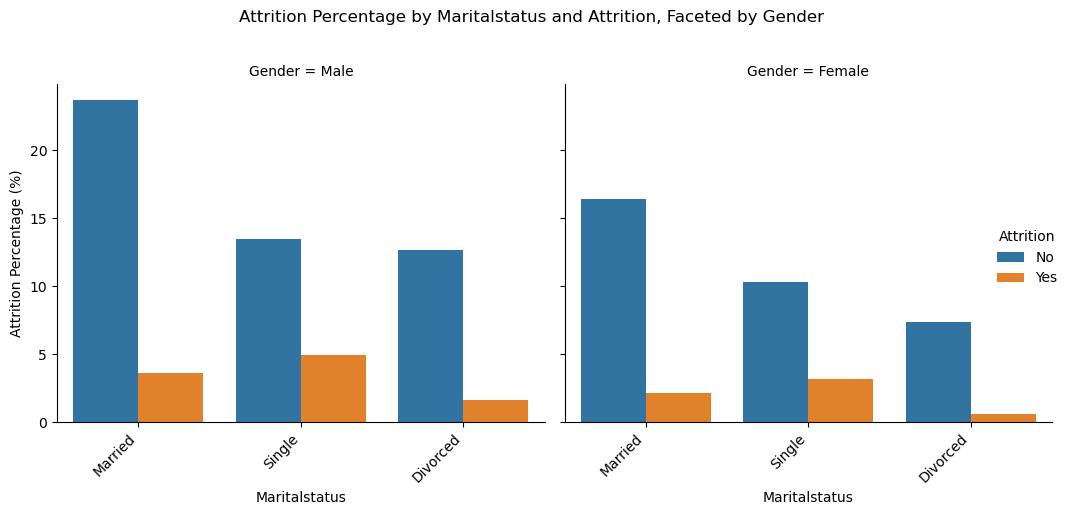


--- Attrition Analysis by OverTime, Gender, and Attrition ---
  OverTime  Gender Attrition  AttritionCount  AttritionPercentage
2       No    Male        No             576            39.183673
0       No  Female        No             368            25.034014
6      Yes    Male        No             156            10.612245
4      Yes  Female        No             133             9.047619
7      Yes    Male       Yes              80             5.442177
3       No    Male       Yes              70             4.761905
5      Yes  Female       Yes              47             3.197279
1       No  Female       Yes              40             2.721088


<Figure size 1400x600 with 0 Axes>

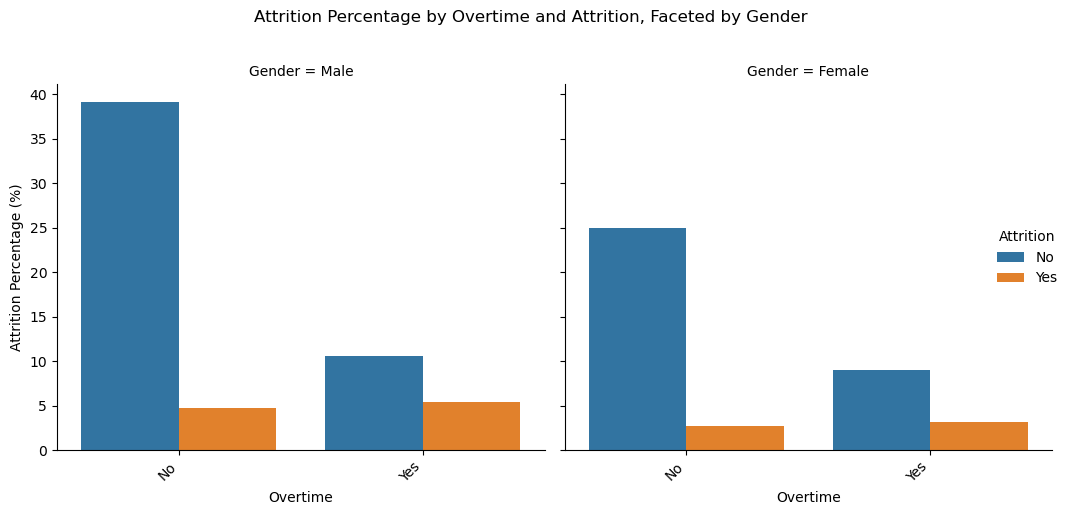


--- Attrition Analysis by Education_label, Gender, and Attrition ---
   Education_label  Gender Attrition  AttritionCount  AttritionPercentage
2         Bachelor    Male        No             276            18.775510
18          Master    Male        No             202            13.741497
0         Bachelor  Female        No             197            13.401361
10         College    Male        No             140             9.523810
16          Master  Female        No             138             9.387755
8          College  Female        No              98             6.666667
6    Below College    Male        No              90             6.122449
3         Bachelor    Male       Yes              61             4.149660
4    Below College  Female        No              49             3.333333
19          Master    Male       Yes              42             2.857143
1         Bachelor  Female       Yes              38             2.585034
11         College    Male       Yes      

<Figure size 1400x600 with 0 Axes>

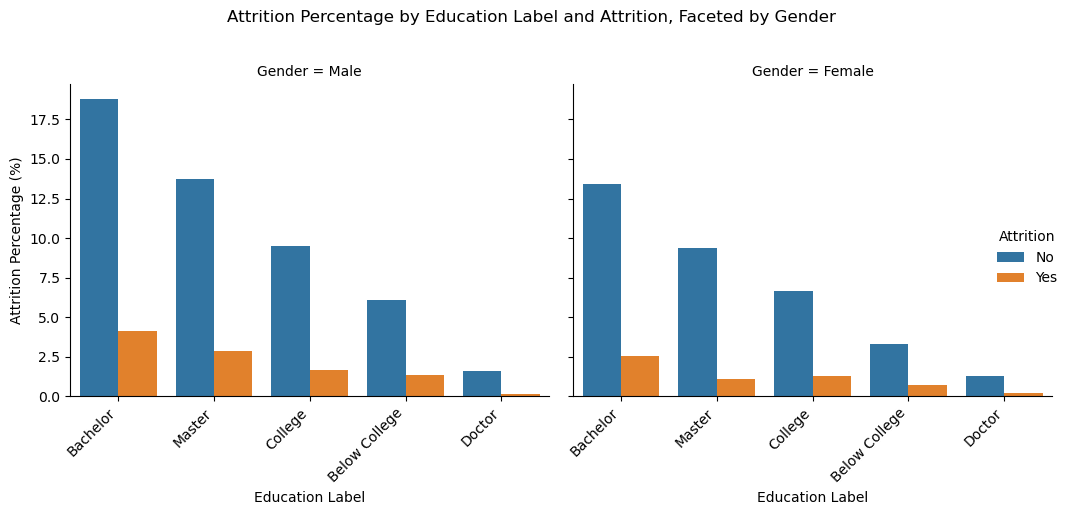


--- Attrition Analysis by EnvironmentSatisfaction_label, Gender, and Attrition ---
   EnvironmentSatisfaction_label  Gender Attrition  AttritionCount  \
14                     Very High    Male        No             233   
2                           High    Male        No             220   
0                           High  Female        No             171   
12                     Very High  Female        No             153   
10                        Medium    Male        No             152   
6                            Low    Male        No             127   
8                         Medium  Female        No              92   
4                            Low  Female        No              85   
3                           High    Male       Yes              44   
7                            Low    Male       Yes              44   
15                     Very High    Male       Yes              39   
5                            Low  Female       Yes              28   
11    

<Figure size 1400x600 with 0 Axes>

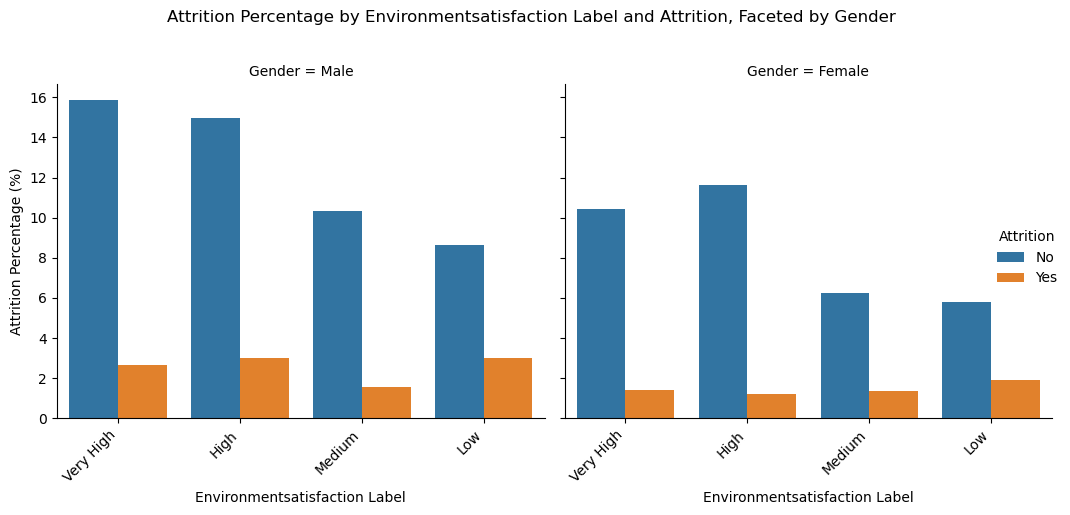


--- Attrition Analysis by JobInvolvement_label, Gender, and Attrition ---
   JobInvolvement_label  Gender Attrition  AttritionCount  AttritionPercentage
2                  High    Male        No             444            30.204082
0                  High  Female        No             299            20.340136
10               Medium    Male        No             168            11.428571
8                Medium  Female        No             136             9.251701
14            Very High    Male        No              84             5.714286
3                  High    Male       Yes              79             5.374150
11               Medium    Male       Yes              48             3.265306
12            Very High  Female        No              47             3.197279
1                  High  Female       Yes              46             3.129252
6                   Low    Male        No              36             2.448980
9                Medium  Female       Yes              2

<Figure size 1400x600 with 0 Axes>

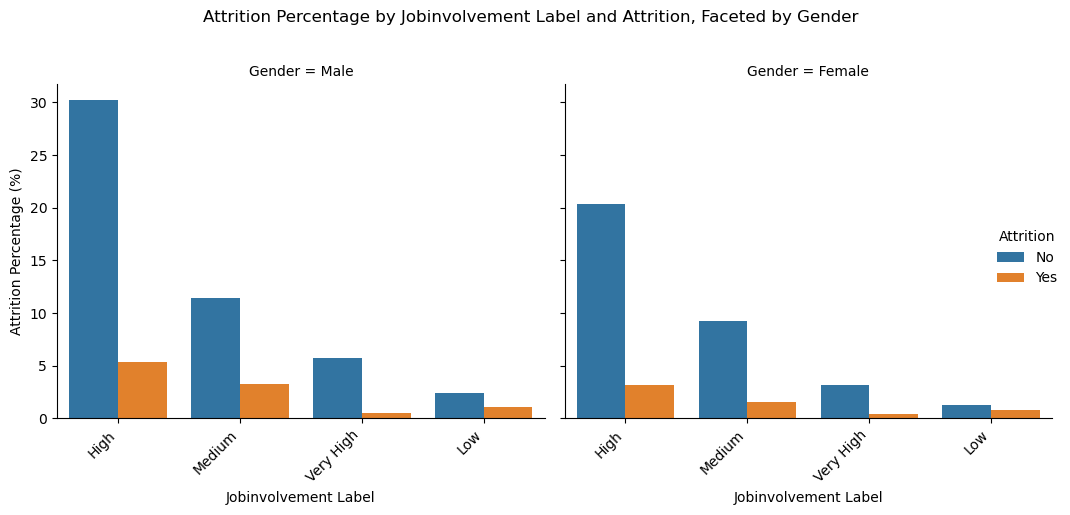


--- Attrition Analysis by JobSatisfaction_label, Gender, and Attrition ---
   JobSatisfaction_label  Gender Attrition  AttritionCount  \
14             Very High    Male        No             253   
2                   High    Male        No             214   
0                   High  Female        No             155   
12             Very High  Female        No             154   
10                Medium    Male        No             140   
6                    Low    Male        No             125   
4                    Low  Female        No              98   
8                 Medium  Female        No              94   
3                   High    Male       Yes              47   
7                    Low    Male       Yes              45   
15             Very High    Male       Yes              36   
1                   High  Female       Yes              26   
9                 Medium  Female       Yes              24   
11                Medium    Male       Yes              

<Figure size 1400x600 with 0 Axes>

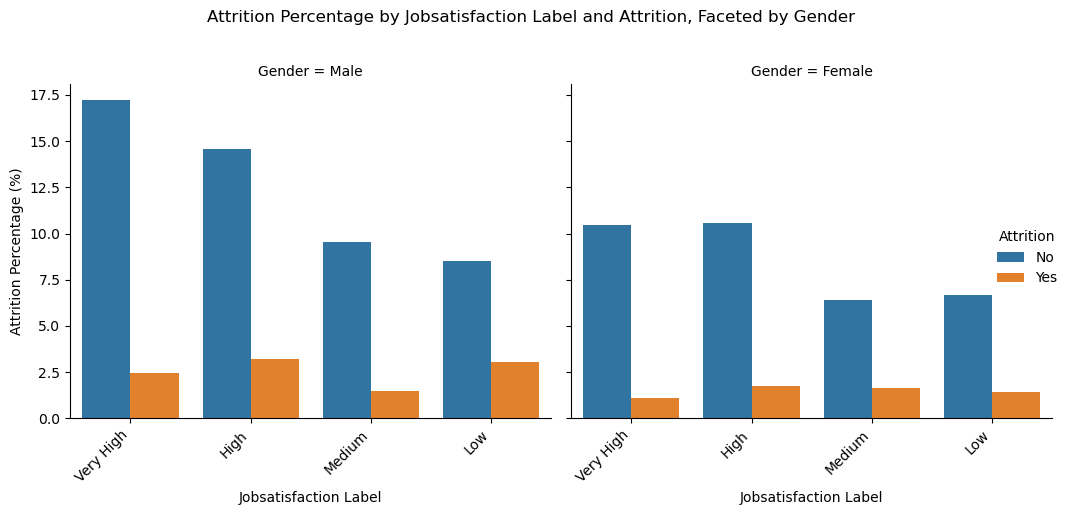


--- Attrition Analysis by PerformanceRating_label, Gender, and Attrition ---
  PerformanceRating_label  Gender Attrition  AttritionCount  \
2               Excellent    Male        No             622   
0               Excellent  Female        No             422   
3               Excellent    Male       Yes             128   
6             Outstanding    Male        No             110   
4             Outstanding  Female        No              79   
1               Excellent  Female       Yes              72   
7             Outstanding    Male       Yes              22   
5             Outstanding  Female       Yes              15   

   AttritionPercentage  
2            42.312925  
0            28.707483  
3             8.707483  
6             7.482993  
4             5.374150  
1             4.897959  
7             1.496599  
5             1.020408  


<Figure size 1400x600 with 0 Axes>

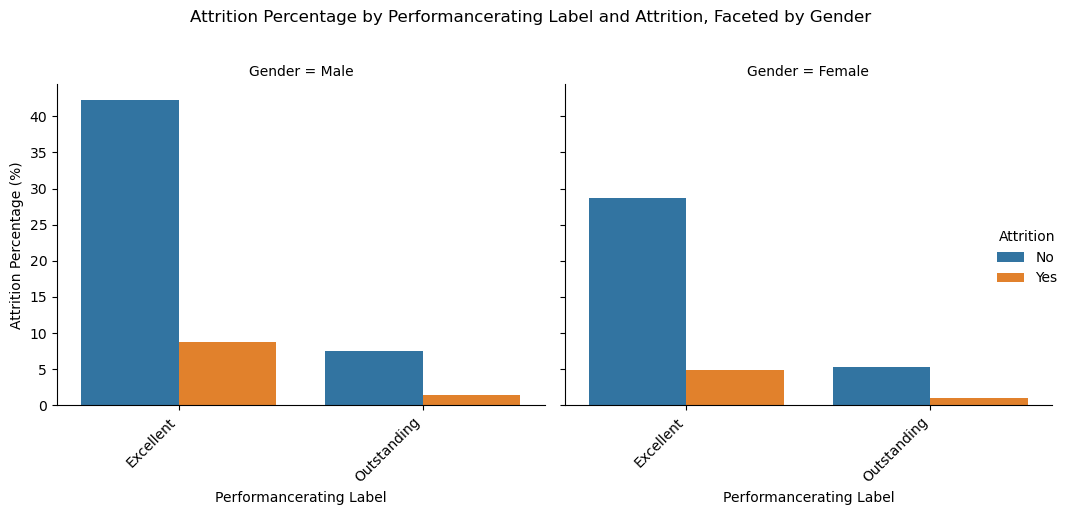


--- Attrition Analysis by RelationshipSatisfaction_label, Gender, and Attrition ---
   RelationshipSatisfaction_label  Gender Attrition  AttritionCount  \
14                      Very High    Male        No             225   
2                            High    Male        No             222   
0                            High  Female        No             166   
10                         Medium    Male        No             156   
12                      Very High  Female        No             143   
6                             Low    Male        No             129   
8                          Medium  Female        No             102   
4                             Low  Female        No              90   
3                            High    Male       Yes              48   
15                      Very High    Male       Yes              42   
11                         Medium    Male       Yes              31   
7                             Low    Male       Yes            

<Figure size 1400x600 with 0 Axes>

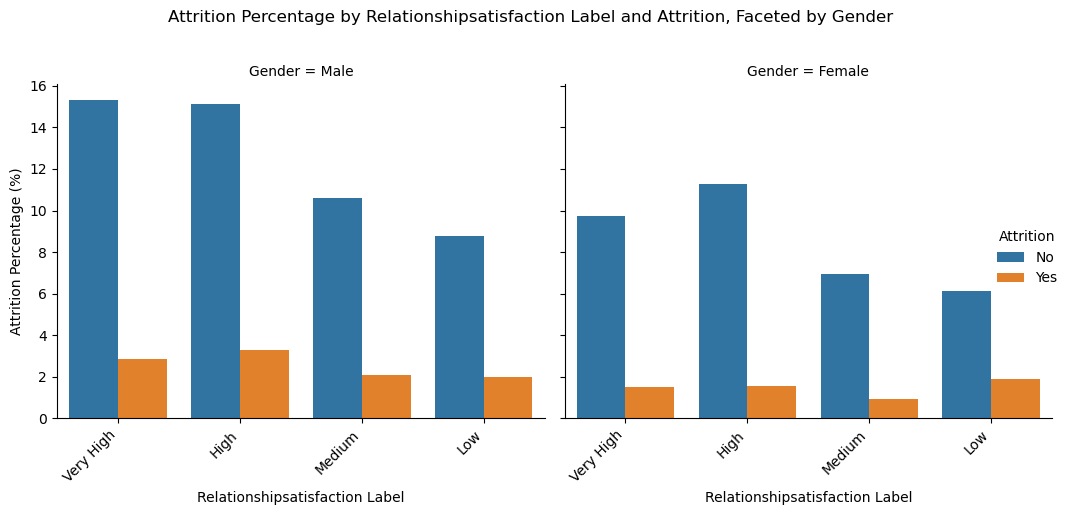


--- Attrition Analysis by WorkLifeBalance_label, Gender, and Attrition ---
   WorkLifeBalance_label  Gender Attrition  AttritionCount  \
10                Better    Male        No             448   
8                 Better  Female        No             318   
14                  Good    Male        No             169   
12                  Good  Female        No             117   
6                   Best    Male        No              83   
11                Better    Male       Yes              80   
9                 Better  Female       Yes              47   
4                   Best  Female        No              43   
15                  Good    Male       Yes              39   
2                    Bad    Male        No              32   
0                    Bad  Female        No              23   
13                  Good  Female       Yes              19   
3                    Bad    Male       Yes              18   
5                   Best  Female       Yes              

<Figure size 1400x600 with 0 Axes>

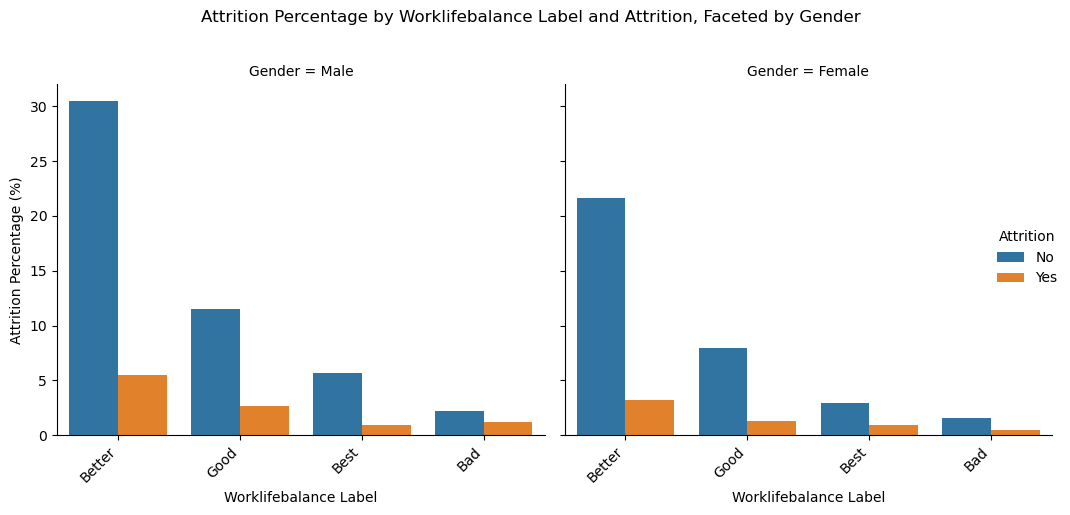

In [105]:
def analyze_attrition_by_category_gender(df, category_col, attrition_col='Attrition', gender_col='Gender'):
    """
    Analyzes the percentage of attrition for each category within a specified
    categorical column, broken down by gender and attrition status, and visualizes
    the results using a faceted bar plot.

    Args:
        df (pd.DataFrame): The DataFrame containing employee data.
        category_col (str): The name of the categorical column to analyze (e.g., 'Department', 'JobRole').
        attrition_col (str): The name of the attrition column (e.g., 'Attrition' with values like 'Yes', 'No' or True, False).
        gender_col (str): The name of the gender column.

    Returns:
        pd.DataFrame: DataFrame showing the percentage of attrition for each
                      category, gender, and attrition status combination. Also displays a faceted bar plot.
    """
    if attrition_col not in df.columns:
        print(f"Error: Attrition column '{attrition_col}' not found.")
        return None
    if category_col not in df.columns:
        print(f"Error: Categorical column '{category_col}' not found.")
        return None
    if gender_col not in df.columns:
        print(f"Error: Gender column '{gender_col}' not found.")
        return None

    attrition_by_category_gender = df.groupby([category_col, gender_col, attrition_col]).size().reset_index(name='AttritionCount')
    # Calculate the total number of attritions
    total_attrition = attrition_by_category_gender['AttritionCount'].sum()

    # Calculate the percentage for each education level
    attrition_by_category_gender['AttritionPercentage'] = (attrition_by_category_gender['AttritionCount'] / total_attrition) * 100
    attrition_by_category_gender = attrition_by_category_gender.sort_values(ascending=False, by= 'AttritionPercentage')
 
    print(f"\n--- Attrition Analysis by {category_col}, {gender_col}, and {attrition_col} ---")
    print(attrition_by_category_gender)

    # Create Faceted Barplot by Category, Gender, and Attrition
    plt.figure(figsize=(14, 6))
    g = sns.catplot(x=category_col, y='AttritionPercentage', hue=attrition_col, col=gender_col,
                    data=attrition_by_category_gender, kind='bar', col_wrap=2, errorbar=None)
    g.fig.suptitle(f'Attrition Percentage by {category_col.replace("_", " ").title()} and {attrition_col.replace("_", " ").title()}, Faceted by {gender_col.replace("_", " ").title()}', y=1.02)
    g.set_xlabels(category_col.replace('_', ' ').title())
    g.set_ylabels('Attrition Percentage (%)')
    g.set_xticklabels(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return attrition_by_category_gender



# List of categorical columns to analyze 
categorical_cols_to_analyze = df.select_dtypes(include=object).columns
# Remove columns
#'Attrition'
rm_colums = ['Attrition','Gender']
categorical_cols_to_analyze = [column_x for column_x in categorical_cols_to_analyze  if column_x not in rm_colums ]



# Loop through each categorical column and analyze attrition by Gender and Attrition
for cat_col in categorical_cols_to_analyze:
    analyze_attrition_by_category_gender(df, cat_col)


--- Attrition Analysis by BusinessTravel and Gender ---
      BusinessTravel  Gender  AttritionCount  AttritionPercentage
5      Travel_Rarely    Male             102            43.037975
4      Travel_Rarely  Female              54            22.784810
3  Travel_Frequently    Male              39            16.455696
2  Travel_Frequently  Female              30            12.658228
1         Non-Travel    Male               9             3.797468
0         Non-Travel  Female               3             1.265823


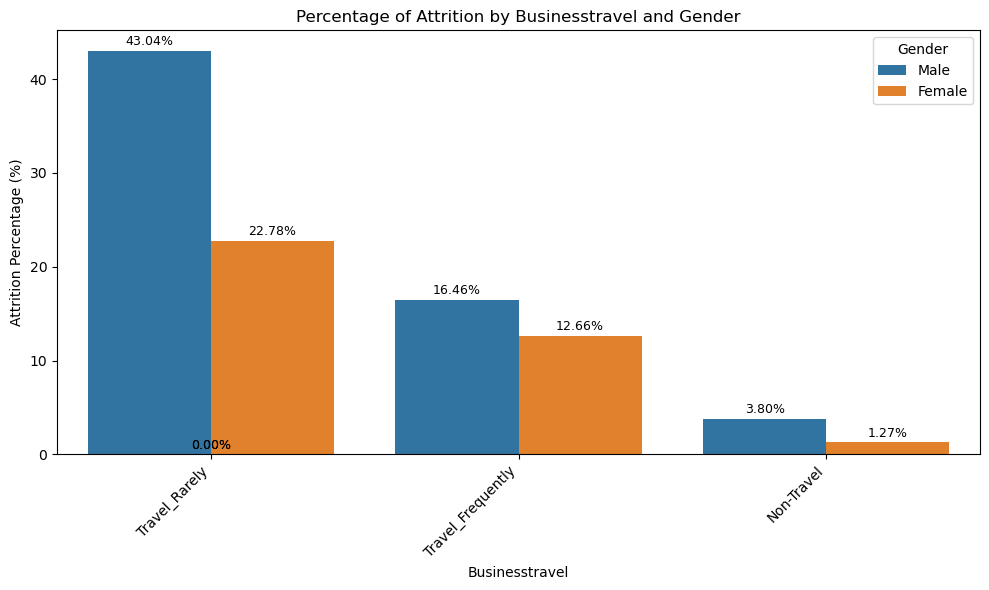


--- Attrition Analysis by Department and Gender ---
               Department  Gender  AttritionCount  AttritionPercentage
3  Research & Development    Male              90            37.974684
5                   Sales    Male              54            22.784810
2  Research & Development  Female              43            18.143460
4                   Sales  Female              38            16.033755
1         Human Resources    Male               6             2.531646
0         Human Resources  Female               6             2.531646


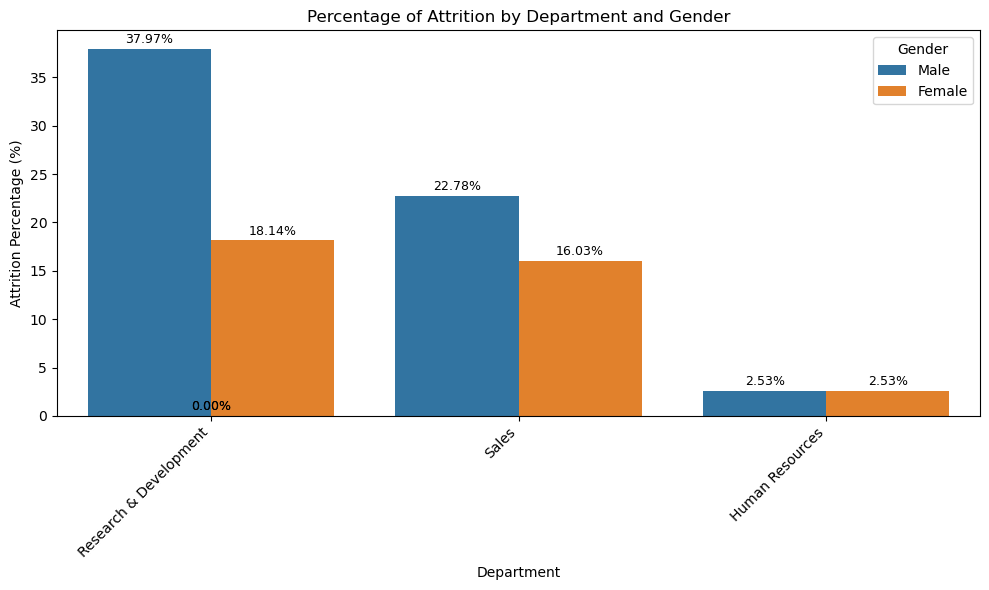


--- Attrition Analysis by EducationField and Gender ---
      EducationField  Gender  AttritionCount  AttritionPercentage
3      Life Sciences    Male              51            21.518987
7            Medical    Male              44            18.565401
2      Life Sciences  Female              38            16.033755
11  Technical Degree    Male              22             9.282700
5          Marketing    Male              20             8.438819
6            Medical  Female              19             8.016878
4          Marketing  Female              15             6.329114
10  Technical Degree  Female              10             4.219409
9              Other    Male               9             3.797468
1    Human Resources    Male               4             1.687764
0    Human Resources  Female               3             1.265823
8              Other  Female               2             0.843882


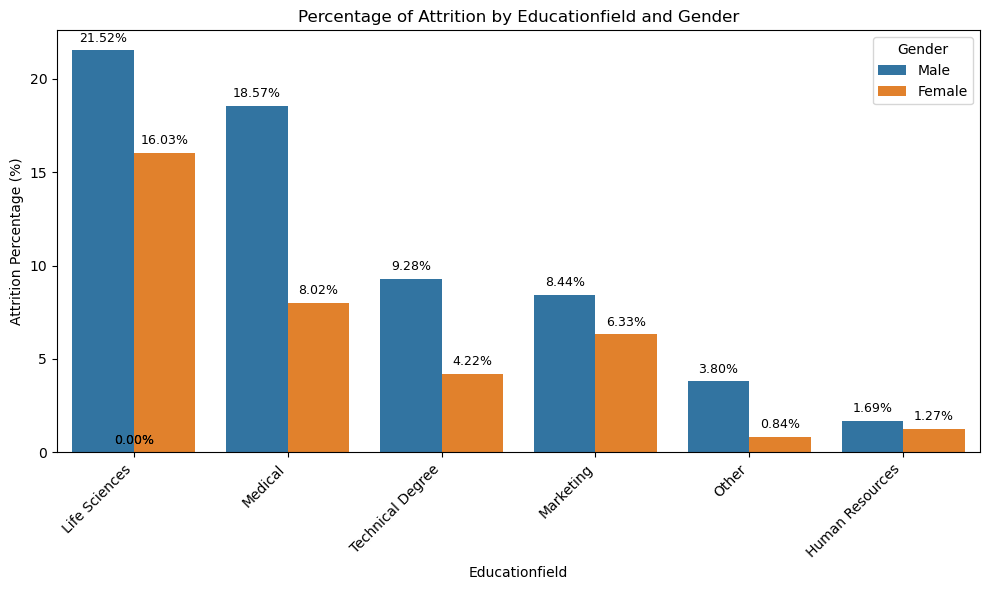


--- Attrition Analysis by JobRole and Gender ---
                      JobRole  Gender  AttritionCount  AttritionPercentage
5       Laboratory Technician    Male              46            19.409283
15            Sales Executive    Male              37            15.611814
13         Research Scientist    Male              30            12.658228
14            Sales Executive  Female              20             8.438819
12         Research Scientist  Female              17             7.172996
17       Sales Representative    Male              17             7.172996
16       Sales Representative  Female              16             6.751055
4       Laboratory Technician  Female              16             6.751055
2             Human Resources  Female               6             2.531646
3             Human Resources    Male               6             2.531646
9      Manufacturing Director    Male               6             2.531646
0   Healthcare Representative  Female             

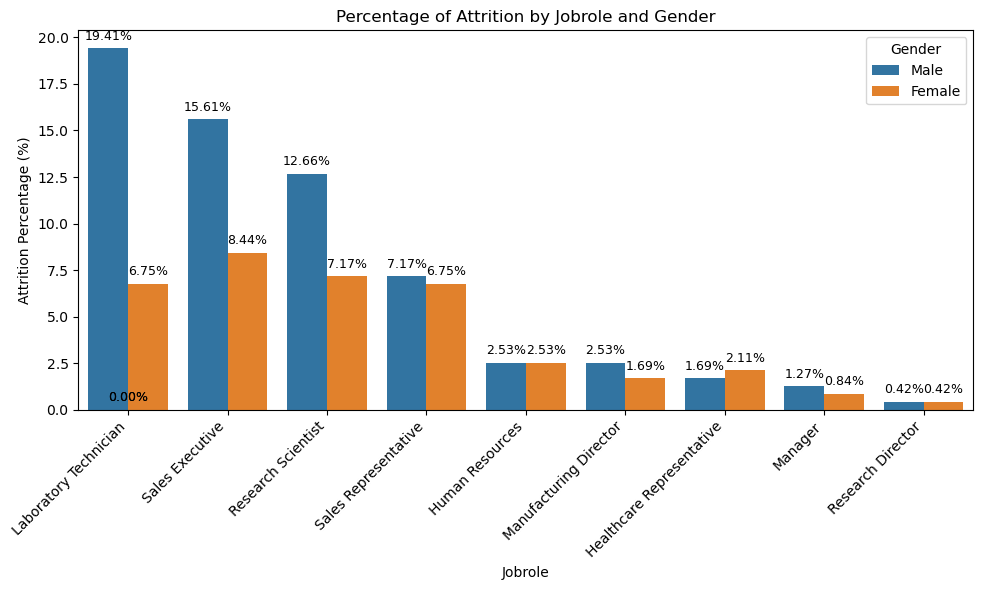


--- Attrition Analysis by MaritalStatus and Gender ---
  MaritalStatus  Gender  AttritionCount  AttritionPercentage
5        Single    Male              73            30.801688
3       Married    Male              53            22.362869
4        Single  Female              47            19.831224
2       Married  Female              31            13.080169
1      Divorced    Male              24            10.126582
0      Divorced  Female               9             3.797468


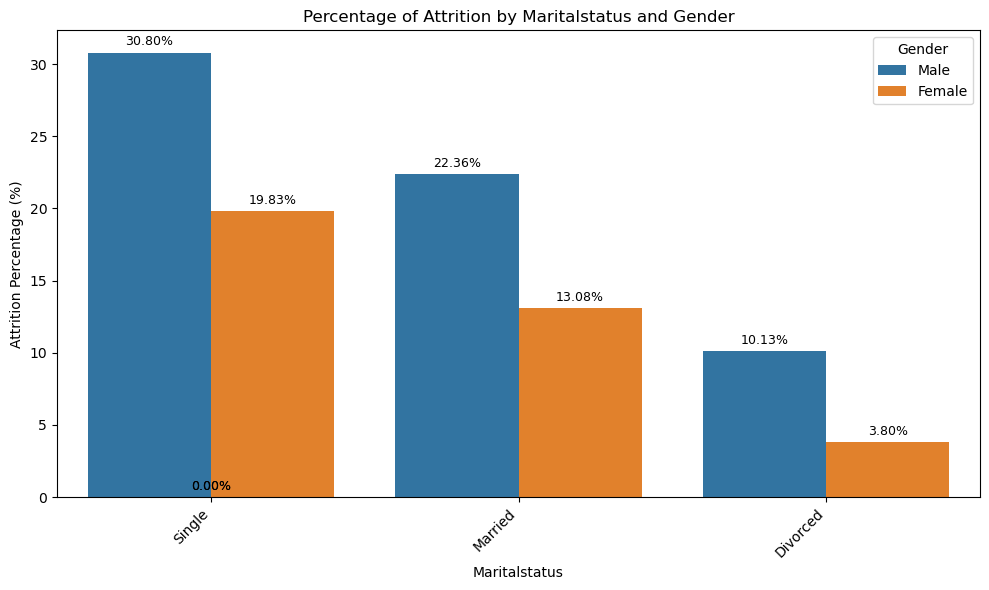


--- Attrition Analysis by OverTime and Gender ---
  OverTime  Gender  AttritionCount  AttritionPercentage
3      Yes    Male              80            33.755274
1       No    Male              70            29.535865
2      Yes  Female              47            19.831224
0       No  Female              40            16.877637


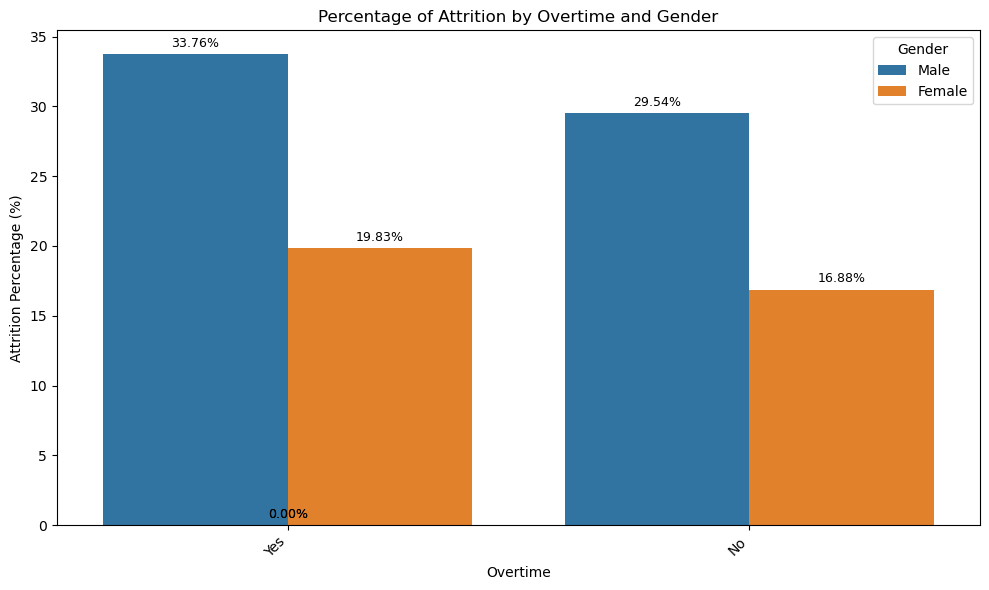


--- Attrition Analysis by Education_label and Gender ---
  Education_label  Gender  AttritionCount  AttritionPercentage
1        Bachelor    Male              61            25.738397
9          Master    Male              42            17.721519
0        Bachelor  Female              38            16.033755
5         College    Male              25            10.548523
3   Below College    Male              20             8.438819
4         College  Female              19             8.016878
8          Master  Female              16             6.751055
2   Below College  Female              11             4.641350
6          Doctor  Female               3             1.265823
7          Doctor    Male               2             0.843882


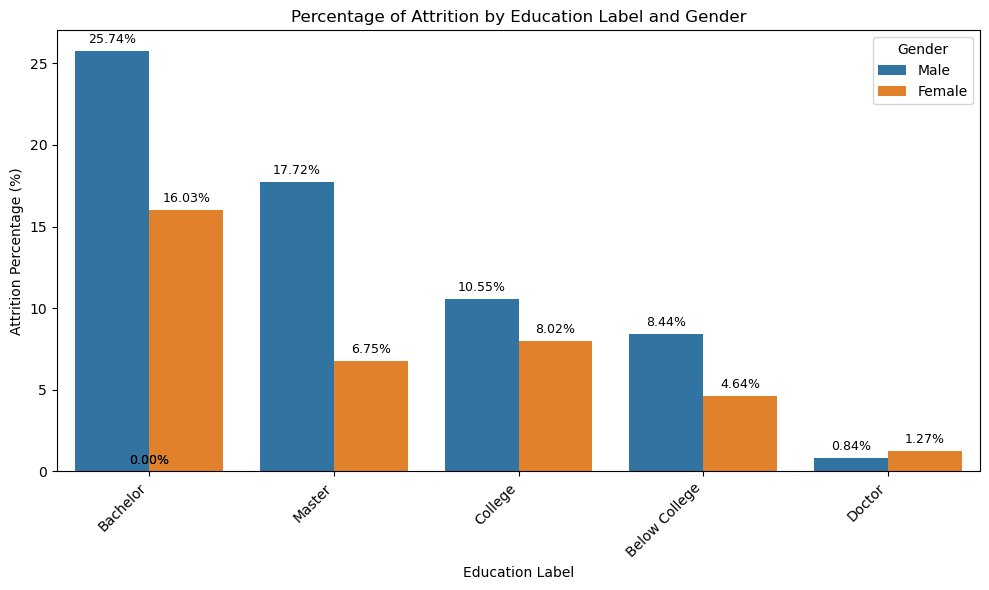


--- Attrition Analysis by EnvironmentSatisfaction_label and Gender ---
  EnvironmentSatisfaction_label  Gender  AttritionCount  AttritionPercentage
1                          High    Male              44            18.565401
3                           Low    Male              44            18.565401
7                     Very High    Male              39            16.455696
2                           Low  Female              28            11.814346
5                        Medium    Male              23             9.704641
6                     Very High  Female              21             8.860759
4                        Medium  Female              20             8.438819
0                          High  Female              18             7.594937


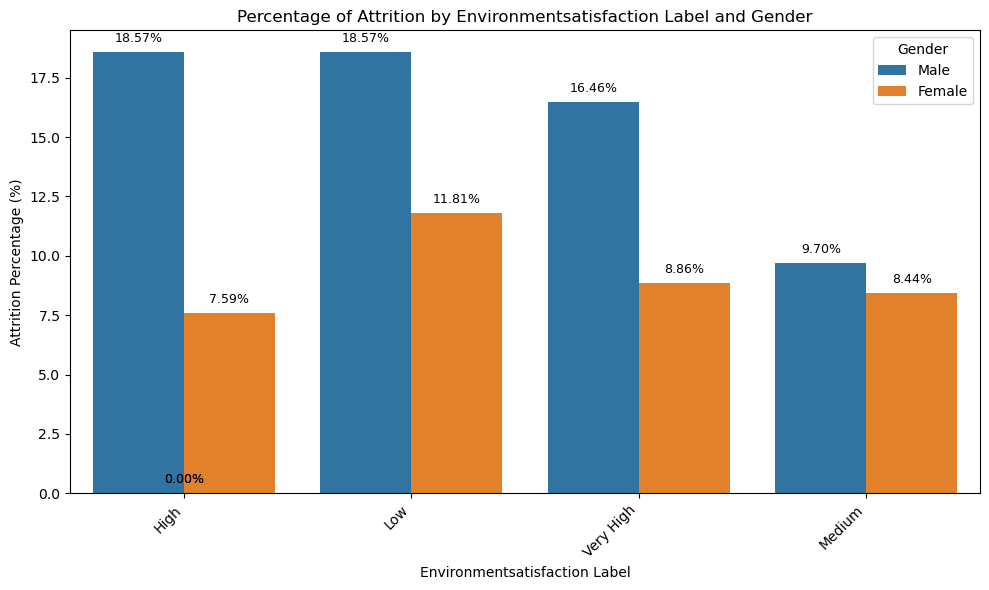


--- Attrition Analysis by JobInvolvement_label and Gender ---
  JobInvolvement_label  Gender  AttritionCount  AttritionPercentage
1                 High    Male              79            33.333333
5               Medium    Male              48            20.253165
0                 High  Female              46            19.409283
4               Medium  Female              23             9.704641
3                  Low    Male              16             6.751055
2                  Low  Female              12             5.063291
7            Very High    Male               7             2.953586
6            Very High  Female               6             2.531646


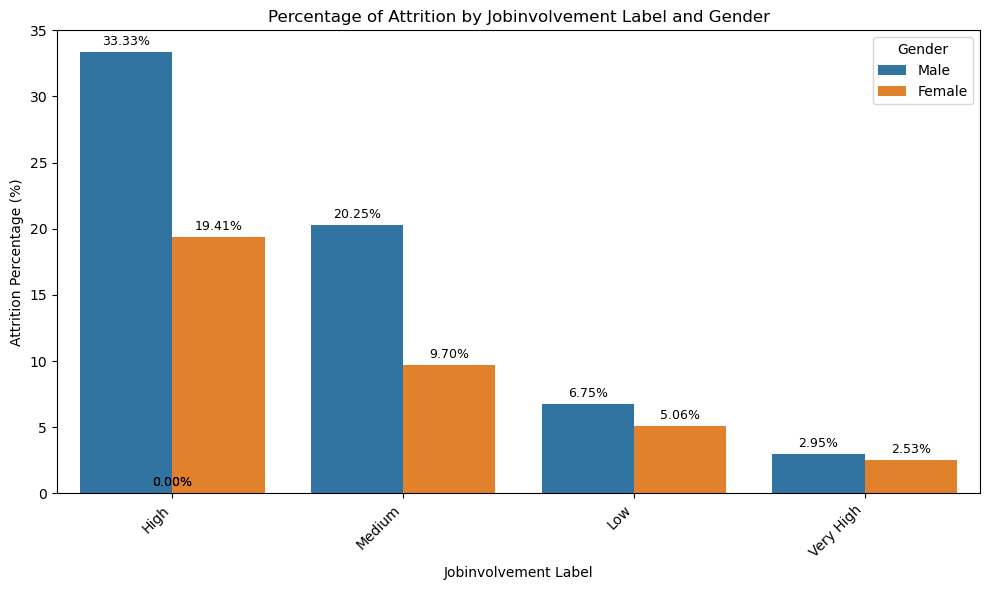


--- Attrition Analysis by JobSatisfaction_label and Gender ---
  JobSatisfaction_label  Gender  AttritionCount  AttritionPercentage
1                  High    Male              47            19.831224
3                   Low    Male              45            18.987342
7             Very High    Male              36            15.189873
0                  High  Female              26            10.970464
4                Medium  Female              24            10.126582
5                Medium    Male              22             9.282700
2                   Low  Female              21             8.860759
6             Very High  Female              16             6.751055


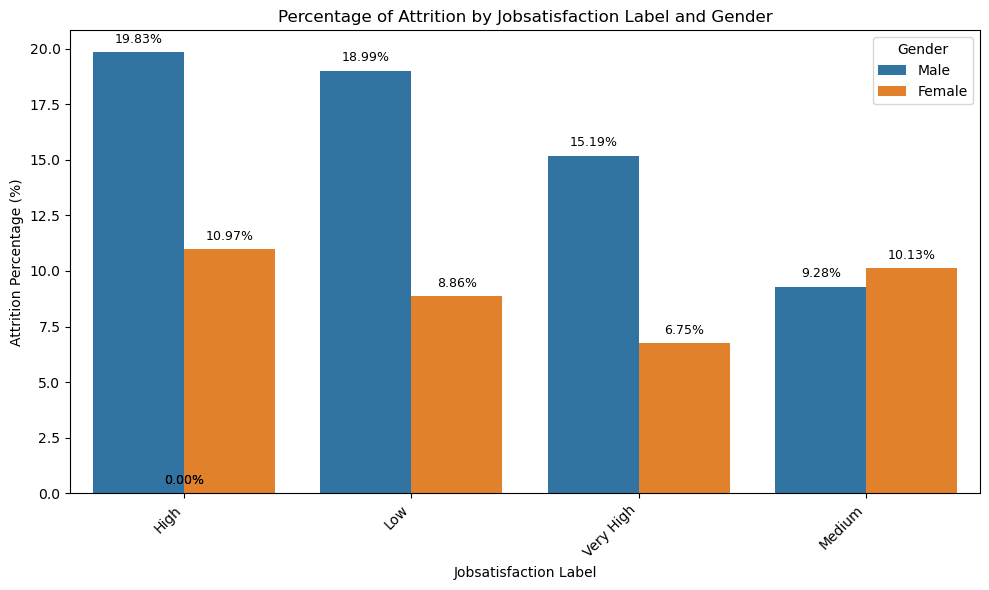


--- Attrition Analysis by PerformanceRating_label and Gender ---
  PerformanceRating_label  Gender  AttritionCount  AttritionPercentage
1               Excellent    Male             128            54.008439
0               Excellent  Female              72            30.379747
3             Outstanding    Male              22             9.282700
2             Outstanding  Female              15             6.329114


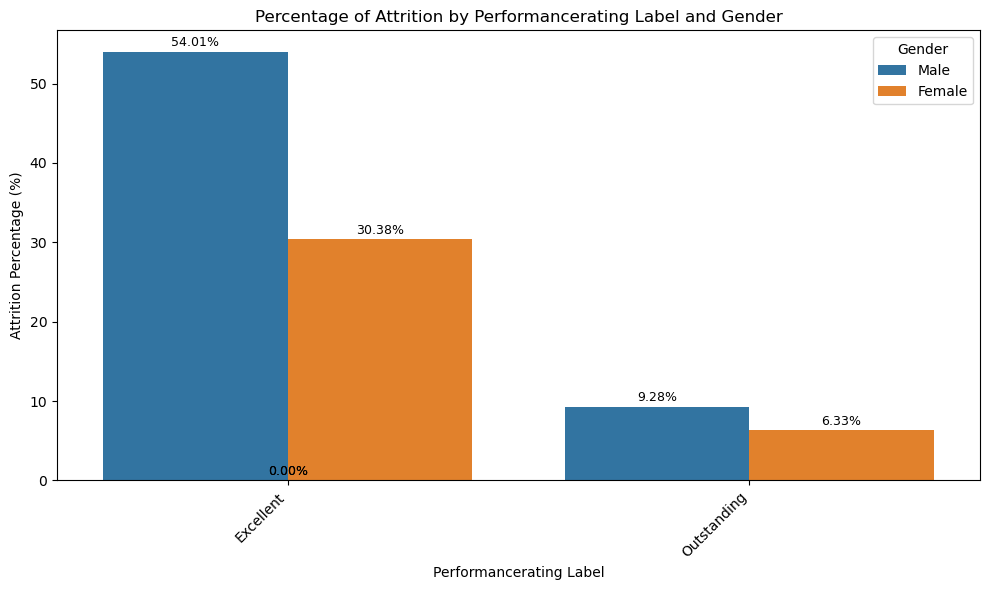


--- Attrition Analysis by RelationshipSatisfaction_label and Gender ---
  RelationshipSatisfaction_label  Gender  AttritionCount  AttritionPercentage
1                           High    Male              48            20.253165
7                      Very High    Male              42            17.721519
5                         Medium    Male              31            13.080169
3                            Low    Male              29            12.236287
2                            Low  Female              28            11.814346
0                           High  Female              23             9.704641
6                      Very High  Female              22             9.282700
4                         Medium  Female              14             5.907173


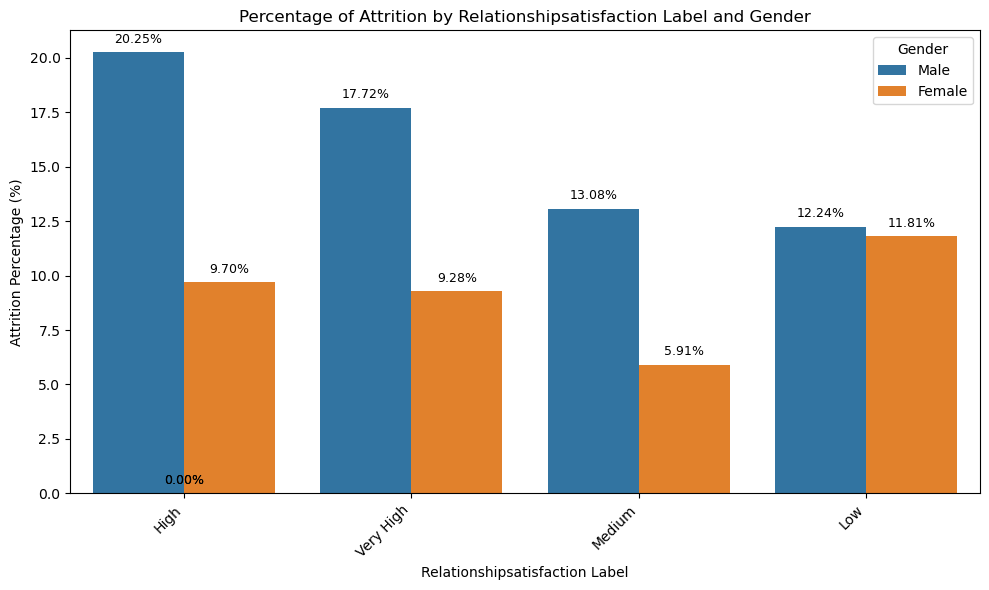


--- Attrition Analysis by WorkLifeBalance_label and Gender ---
  WorkLifeBalance_label  Gender  AttritionCount  AttritionPercentage
5                Better    Male              80            33.755274
4                Better  Female              47            19.831224
7                  Good    Male              39            16.455696
6                  Good  Female              19             8.016878
1                   Bad    Male              18             7.594937
2                  Best  Female              14             5.907173
3                  Best    Male              13             5.485232
0                   Bad  Female               7             2.953586


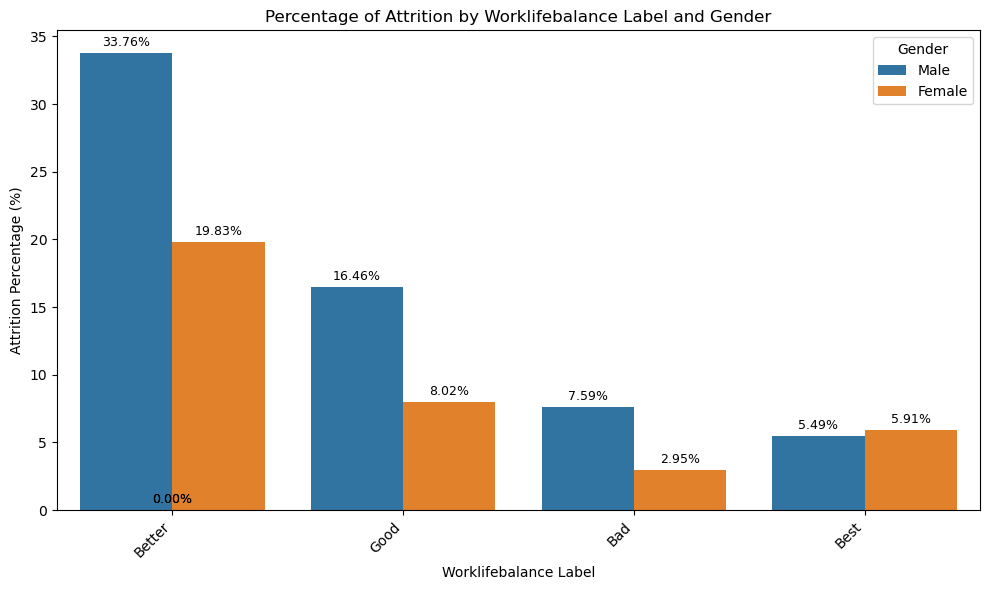

In [ ]:
def analyze_attrition_by_category_gender(df, category_col, attrition_flag_col='Attrition_Flag', gender_col='Gender'):
    """
    Analyzes the percentage of attrition for each category within a specified
    categorical column, broken down by gender.

    Args:
        df (pd.DataFrame): The DataFrame containing employee data.
        category_col (str): The name of the categorical column to analyze (e.g., 'Education_label', 'Department').
        attrition_flag_col (str): The name of the attrition flag column (True/False).
        gender_col (str): The name of the gender column.

    Returns:
        pd.DataFrame: DataFrame showing the percentage of attrition for each
                      category and gender combination. Also displays a bar plot.
    """
    if attrition_flag_col not in df.columns:
        print(f"Error: Attrition flag column '{attrition_flag_col}' not found.")
        return None
    if category_col not in df.columns:
        print(f"Error: Categorical column '{category_col}' not found.")
        return None
    if gender_col not in df.columns:
        print(f"Error: Gender column '{gender_col}' not found.")
        return None

    attrition_df = df[df[attrition_flag_col] == True].copy()

    attrition_by_category_gender = attrition_df.groupby([category_col, gender_col]).size().reset_index(name='AttritionCount')

    total_attrition = attrition_by_category_gender['AttritionCount'].sum()

    if total_attrition > 0:
        attrition_by_category_gender['AttritionPercentage'] = (
            attrition_by_category_gender['AttritionCount'] / total_attrition
        ) * 100
    else:
        attrition_by_category_gender['AttritionPercentage'] = 0.0

    attrition_by_category_gender = attrition_by_category_gender.sort_values(ascending=False, by='AttritionPercentage')

    print(f"\n--- Attrition Analysis by {category_col} and {gender_col} ---")
    print(attrition_by_category_gender)

    # Create Barplot by Category and Gender
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=category_col, y='AttritionPercentage', hue=gender_col, data=attrition_by_category_gender)
    plt.title(f'Percentage of Attrition by {category_col.replace("_", " ").title()} and {gender_col.replace("_", " ").title()}')
    plt.xlabel(category_col.replace('_', ' ').title())
    plt.ylabel('Attrition Percentage (%)')
    for bar in ax.patches:
        yval = bar.get_height()
        if not pd.isna(yval):
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, f'{yval:.2f}%', ha='center', va='bottom', fontsize=9)

    plt.legend(title=gender_col.replace('_', ' ').title())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return attrition_by_category_gender



# List of categorical columns to analyze by Gender
categorical_cols_to_analyze = df.select_dtypes(include=object).columns
# Remove columns
#'Attrition'
rm_colums = ['Attrition','Gender']
categorical_cols_to_analyze = [column_x for column_x in categorical_cols_to_analyze  if column_x not in rm_colums ]


# Loop through each categorical column and analyze attrition by Gender
for cat_col in categorical_cols_to_analyze:
    analyze_attrition_by_category_gender(df, cat_col)

In [ ]:
def analyze_attrition_by_category_gender_flag(df, category_col, attrition_flag_col='Attrition_Flag', gender_col='Gender'):
    """
    Analyzes the count of each category within a specified categorical column,
    broken down by gender and attrition flag.

    Args:
        df (pd.DataFrame): The DataFrame containing employee data.
        category_col (str): The name of the categorical column to analyze (e.g., 'Education_label', 'Department').
        attrition_flag_col (str): The name of the attrition flag column (True/False).
        gender_col (str): The name of the gender column.

    Returns:
        pd.DataFrame: DataFrame showing the count of each category for each
                      combination of gender and attrition flag. Also displays a grouped bar plot.
    """
    if attrition_flag_col not in df.columns:
        print(f"Error: Attrition flag column '{attrition_flag_col}' not found.")
        return None
    if category_col not in df.columns:
        print(f"Error: Categorical column '{category_col}' not found.")
        return None
    if gender_col not in df.columns:
        print(f"Error: Gender column '{gender_col}' not found.")
        return None

    # Group by Category, Gender, and Attrition Flag
    attrition_by_category_gender_flag = df.groupby([category_col, gender_col, attrition_flag_col]).size().reset_index(name='Count')

    print(f"\n--- Analysis by {category_col}, {gender_col}, and {attrition_flag_col} ---")
    print(attrition_by_category_gender_flag)

    # Create Grouped Bar Plot
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x=category_col, y='Count', hue=gender_col, data=attrition_by_category_gender_flag, dodge=True)
    plt.title(f'Count of Employees by {category_col.replace("_", " ").title()}, {gender_col.replace("_", " ").title()}, and {attrition_flag_col.replace("_", " ").title()}')
    plt.xlabel(category_col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.legend(title=gender_col.replace('_', ' ').title())
    plt.xticks(rotation=45, ha='right')

    # Add annotations for counts on the bars
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}',
                    ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Create a separate plot to highlight attrition
    plt.figure(figsize=(12, 7))
    sns.catplot(x=category_col, y='Count', hue=attrition_flag_col, col=gender_col,
                data=attrition_by_category_gender_flag, kind='bar', col_wrap=2)
    plt.suptitle(f'Count of Employees by {category_col.replace("_", " ").title()} and {attrition_flag_col.replace("_", " ").title()}, Faceted by {gender_col.replace("_", " ").title()}', y=1.02)
    plt.xlabel(category_col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return attrition_by_category_gender_flag

# Sample DataFrame (replace with your actual data and column names)
data = {'Attrition_Flag': [True, False, True, False, True, True, False, True, False, True, True, False, True, False, True, False],
        'Education_label': ["highschool", "university", "university", "phd", "highschool",
                            "university", "highschool", "phd", "university", "highschool", "master", "master", "bachelor", "bachelor", "highschool", "university"],
        'Gender': ["Male", "Female", "Male", "Male", "Female", "Male",
                   "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female"],
        'Department': ['Sales', 'HR', 'Sales', 'Engineering', 'Sales', 'Engineering', 'HR', 'Engineering', 'Sales', 'HR', 'Engineering', 'Sales', 'HR', 'Engineering', 'Sales', 'HR'],
        'JobRole': ['Sales Exec', 'HR Manager', 'Sales Rep', 'Engineer', 'Sales Exec', 'Engineer', 'HR Manager', 'Engineer', 'Sales Rep', 'HR Manager', 'Engineer', 'Sales Rep', 'HR Manager', 'Engineer', 'Sales Exec', 'HR Manager']}
df = pd.DataFrame(data)

# List of categorical columns to analyze by Gender and Attrition Flag
categorical_cols_to_analyze = ['Education_label', 'Department', 'JobRole']

# Loop through each categorical column and analyze attrition by Gender and Attrition Flag
for cat_col in categorical_cols_to_analyze:
    analyze_attrition_by_category_gender_flag(df, cat_col)


--- Analyzing Attrition by: BusinessTravel ---
      BusinessTravel  AttritionCount  AttritionPercentage
2      Travel_Rarely             156            65.822785
1  Travel_Frequently              69            29.113924
0         Non-Travel              12             5.063291


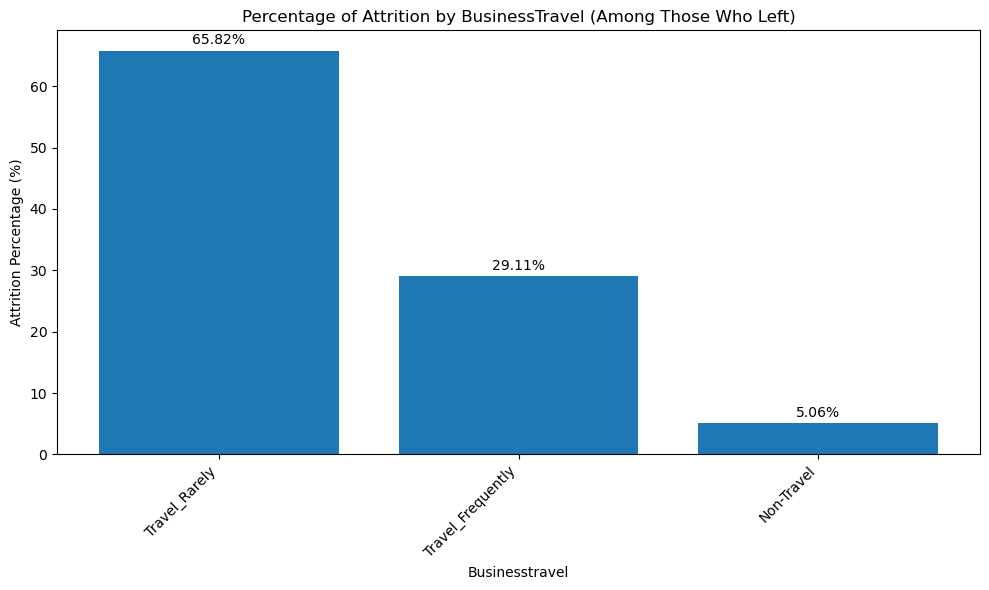


--- Analyzing Attrition by: Department ---
               Department  AttritionCount  AttritionPercentage
1  Research & Development             133            56.118143
2                   Sales              92            38.818565
0         Human Resources              12             5.063291


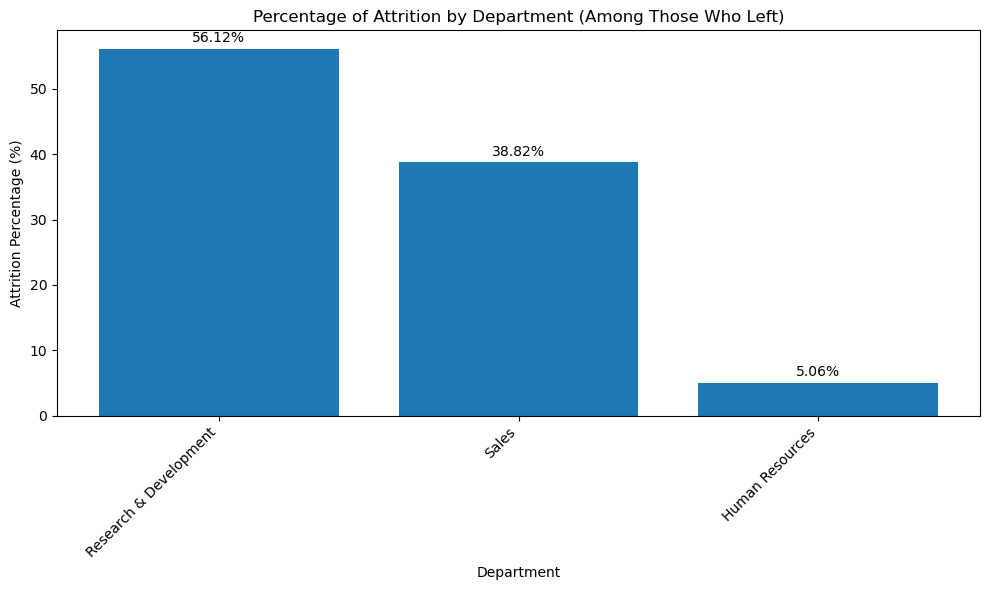


--- Analyzing Attrition by: EducationField ---
     EducationField  AttritionCount  AttritionPercentage
1     Life Sciences              89            37.552743
3           Medical              63            26.582278
2         Marketing              35            14.767932
5  Technical Degree              32            13.502110
4             Other              11             4.641350
0   Human Resources               7             2.953586


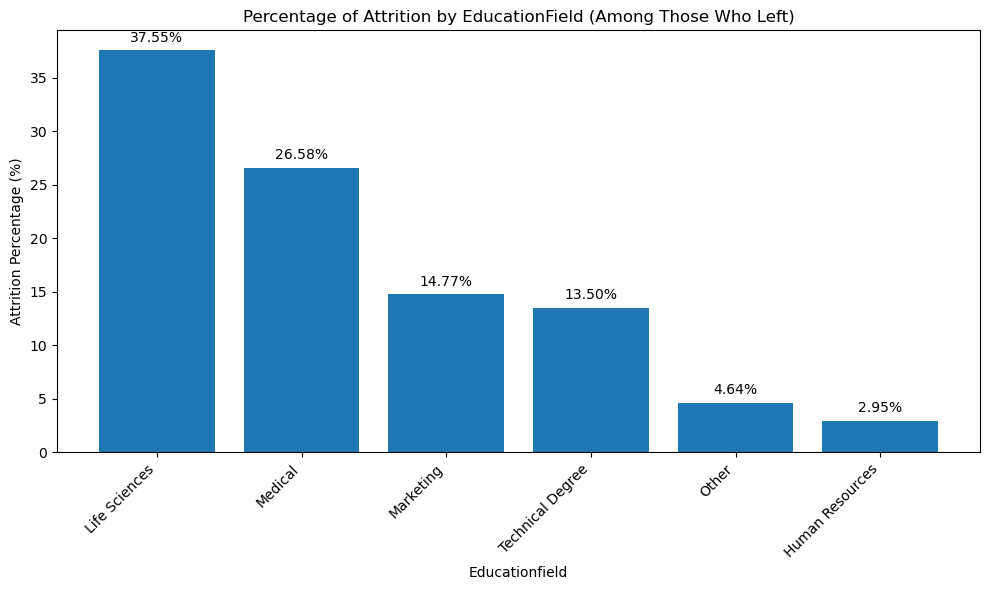


--- Analyzing Attrition by: Gender ---
   Gender  AttritionCount  AttritionPercentage
1    Male             150            63.291139
0  Female              87            36.708861


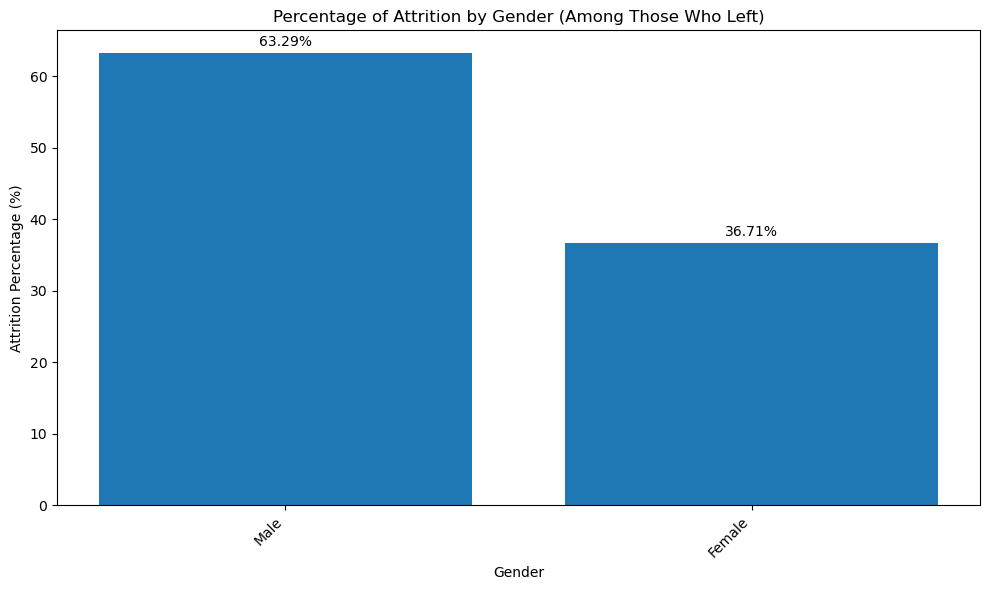


--- Analyzing Attrition by: JobRole ---
                     JobRole  AttritionCount  AttritionPercentage
2      Laboratory Technician              62            26.160338
7            Sales Executive              57            24.050633
6         Research Scientist              47            19.831224
8       Sales Representative              33            13.924051
1            Human Resources              12             5.063291
4     Manufacturing Director              10             4.219409
0  Healthcare Representative               9             3.797468
3                    Manager               5             2.109705
5          Research Director               2             0.843882


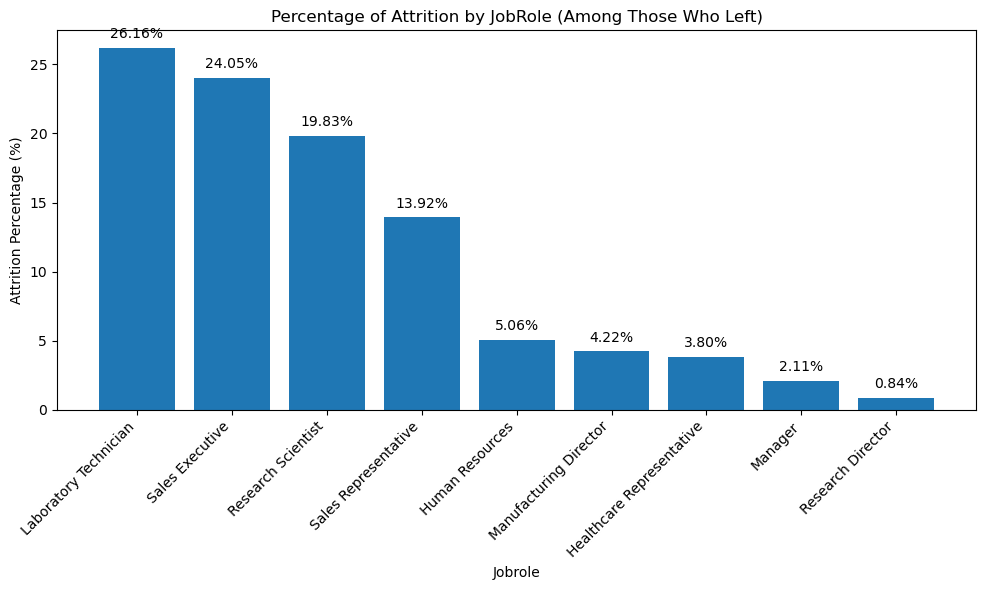


--- Analyzing Attrition by: MaritalStatus ---
  MaritalStatus  AttritionCount  AttritionPercentage
2        Single             120            50.632911
1       Married              84            35.443038
0      Divorced              33            13.924051


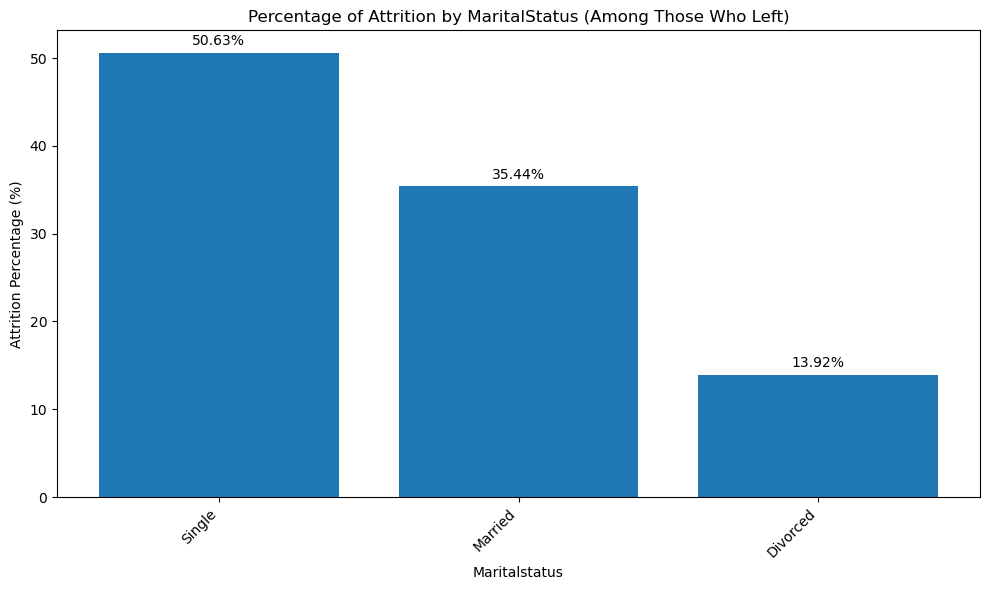


--- Analyzing Attrition by: OverTime ---
  OverTime  AttritionCount  AttritionPercentage
1      Yes             127            53.586498
0       No             110            46.413502


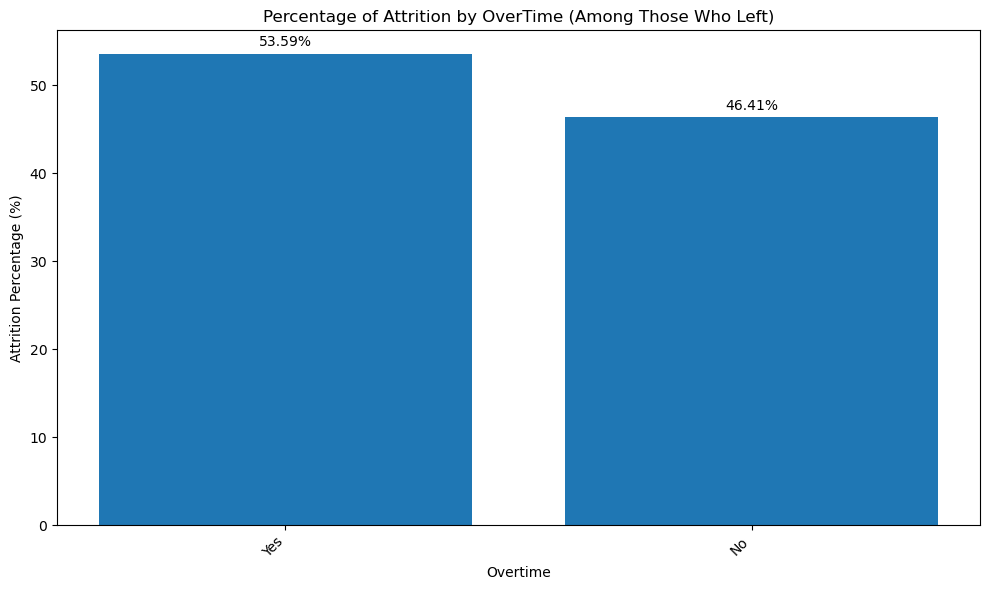


--- Analyzing Attrition by: Education_label ---
  Education_label  AttritionCount  AttritionPercentage
0        Bachelor              99            41.772152
4          Master              58            24.472574
2         College              44            18.565401
1   Below College              31            13.080169
3          Doctor               5             2.109705


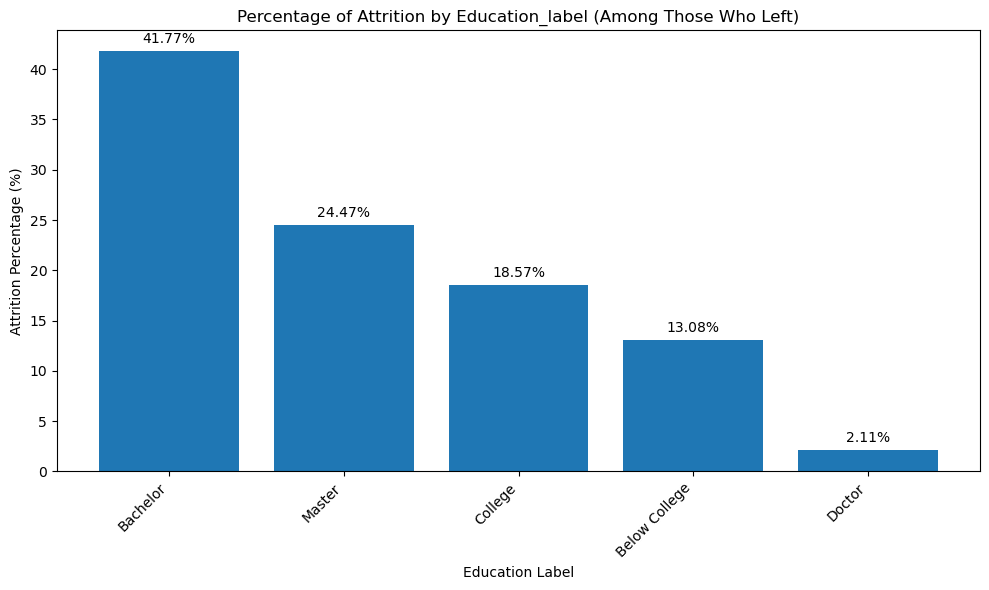


--- Analyzing Attrition by: EnvironmentSatisfaction_label ---
  EnvironmentSatisfaction_label  AttritionCount  AttritionPercentage
1                           Low              72            30.379747
0                          High              62            26.160338
3                     Very High              60            25.316456
2                        Medium              43            18.143460


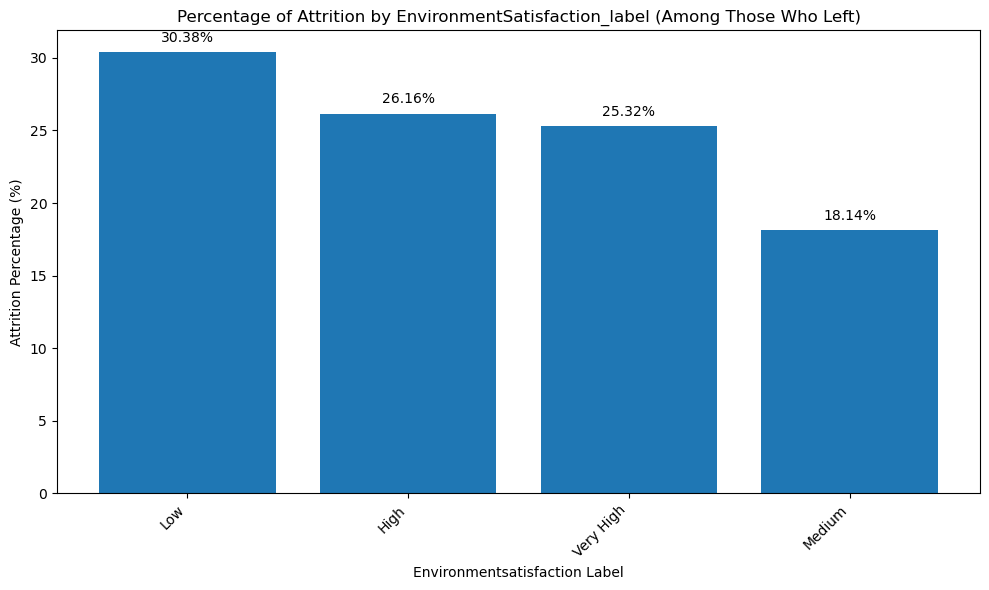


--- Analyzing Attrition by: JobInvolvement_label ---
  JobInvolvement_label  AttritionCount  AttritionPercentage
0                 High             125            52.742616
2               Medium              71            29.957806
1                  Low              28            11.814346
3            Very High              13             5.485232


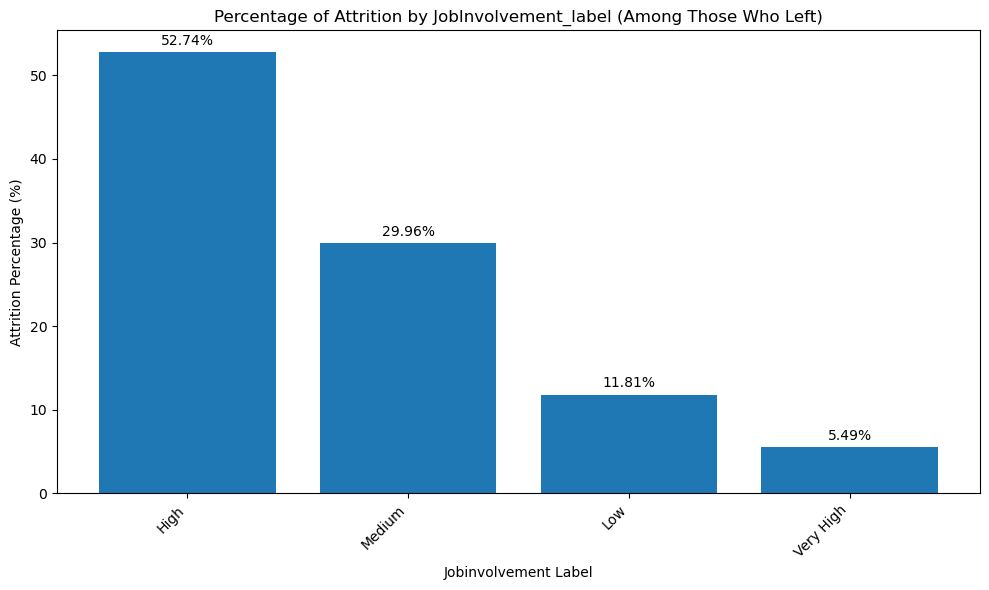


--- Analyzing Attrition by: JobSatisfaction_label ---
  JobSatisfaction_label  AttritionCount  AttritionPercentage
0                  High              73            30.801688
1                   Low              66            27.848101
3             Very High              52            21.940928
2                Medium              46            19.409283


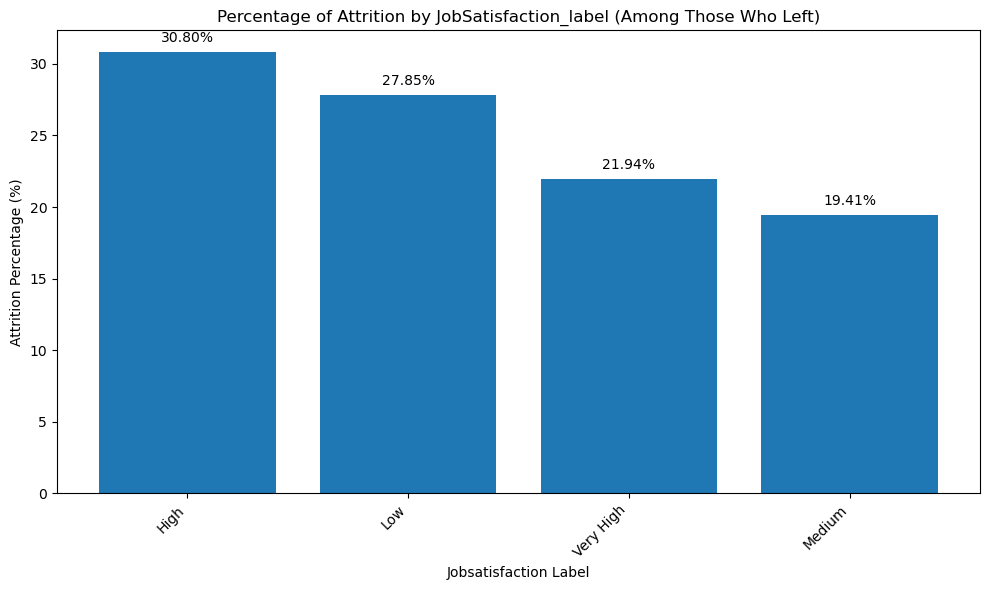


--- Analyzing Attrition by: PerformanceRating_label ---
  PerformanceRating_label  AttritionCount  AttritionPercentage
0               Excellent             200            84.388186
1             Outstanding              37            15.611814


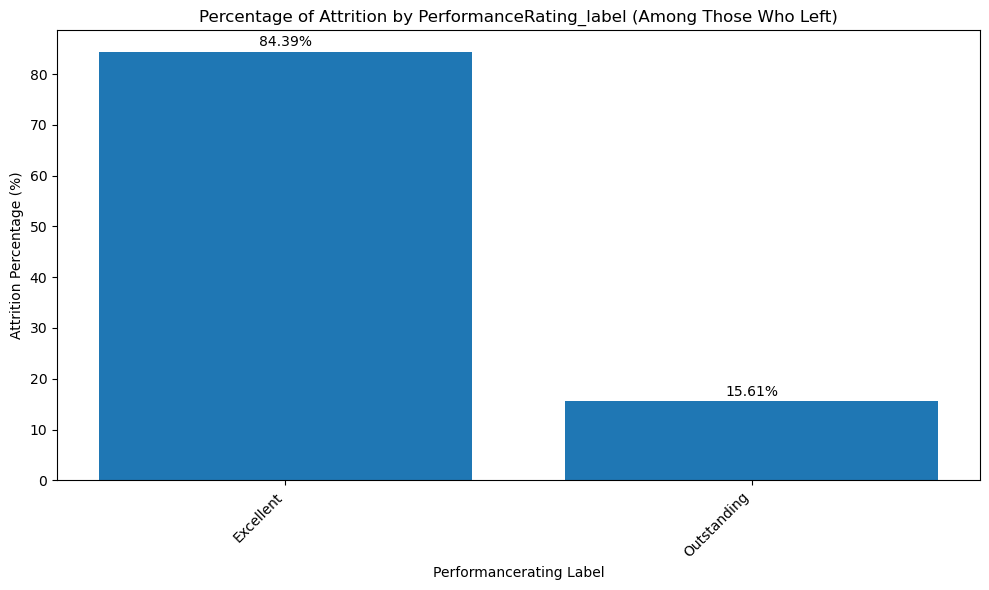


--- Analyzing Attrition by: RelationshipSatisfaction_label ---
  RelationshipSatisfaction_label  AttritionCount  AttritionPercentage
0                           High              71            29.957806
3                      Very High              64            27.004219
1                            Low              57            24.050633
2                         Medium              45            18.987342


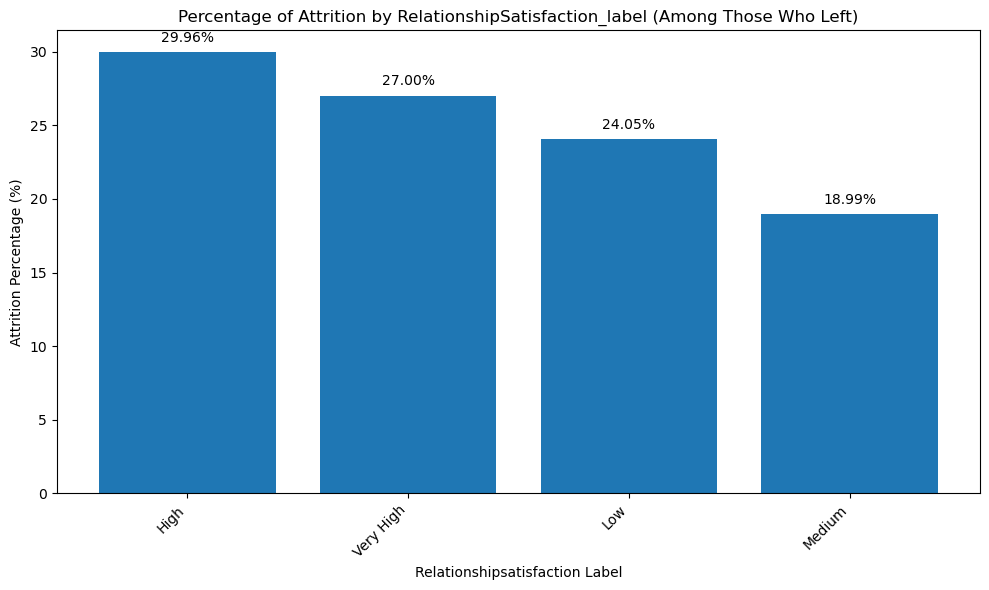


--- Analyzing Attrition by: WorkLifeBalance_label ---
  WorkLifeBalance_label  AttritionCount  AttritionPercentage
2                Better             127            53.586498
3                  Good              58            24.472574
1                  Best              27            11.392405
0                   Bad              25            10.548523


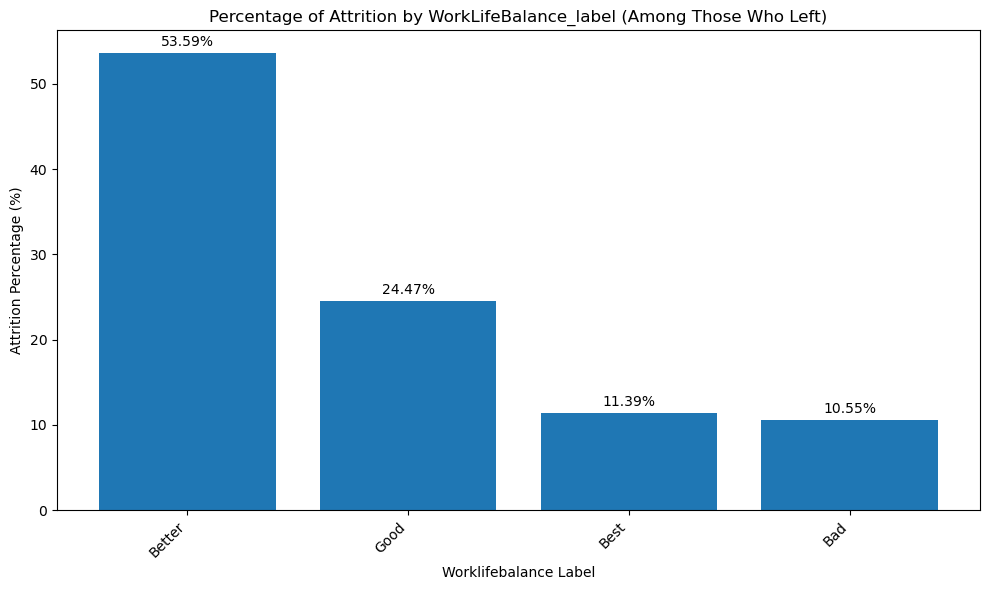

In [ ]:
def analyze_attrition_by_category(df, category_column):
    """
    Analyzes attrition percentage based on a categorical variable.

    Args:
        df (pd.DataFrame): The DataFrame containing employee data with an 'Attrition' column (True/False)
                           and the specified categorical column.
        category_column (str): The name of the categorical column to analyze.

    Returns:
        pd.DataFrame: A DataFrame showing the percentage of attrition for each category,
                      or None if the category column is not found.
    """
    if category_column not in df.columns:
        print(f"Error: Column '{category_column}' not found in the DataFrame.")
        return None

    attrition_df = df[df['Attrition_Flag'] == True].copy()
    attrition_by_category = attrition_df.groupby(category_column).size().reset_index(name='AttritionCount')
    total_attrition = attrition_by_category['AttritionCount'].sum()

    if total_attrition > 0:
        attrition_by_category['AttritionPercentage'] = (attrition_by_category['AttritionCount'] / total_attrition) * 100
        attrition_by_category = attrition_by_category.sort_values(ascending=False, by= 'AttritionPercentage')

    else:
        attrition_by_category['AttritionPercentage'] = 0.0

    return attrition_by_category

def plot_attrition_percentage(df_results, category_column):
    """
    Plots the attrition percentage by category using Plotly barplot.

    Args:
        df_results (pd.DataFrame): DataFrame output from analyze_attrition_by_category.
        category_column (str): The name of the categorical column being plotted.
    """
    if df_results is not None and not df_results.empty:
        plt.figure(figsize=(10, 6))  # Adjust figure size as needed
        bars = plt.bar(df_results[category_column], df_results['AttritionPercentage'])
        plt.title(f'Percentage of Attrition by {category_column} (Among Those Who Left)')
        plt.xlabel(category_column.replace('_', ' ').title())
        plt.ylabel('Attrition Percentage (%)')

        # Add percentage values above the bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    elif df_results is None:
        pass  # Error message already printed in analyze_attrition_by_category
    else:
        print(f"No attrition data to plot for {category_column}.")



# List categorical columns you want to analyze
#categorical_cols_to_analyze = ['Education_label', 'EnvironmentSatisfaction_label','JobInvolvement_label','JobSatisfaction_label','PerformanceRating_label','RelationshipSatisfaction_label','WorkLifeBalance_label']
categorical_cols_to_analyze = df.select_dtypes(include=object).columns
# Remove Attrition colum
categorical_cols_to_analyze = [column_x for column_x in categorical_cols_to_analyze  if column_x != 'Attrition']

# Loop through the list of categorical columns
for col in categorical_cols_to_analyze:
    print(f"\n--- Analyzing Attrition by: {col} ---")
    attrition_results = analyze_attrition_by_category(df, col)
    if attrition_results is not None:
        print(attrition_results)
        plot_attrition_percentage(attrition_results, col)

## Analyze and Visualize a single numerical variable

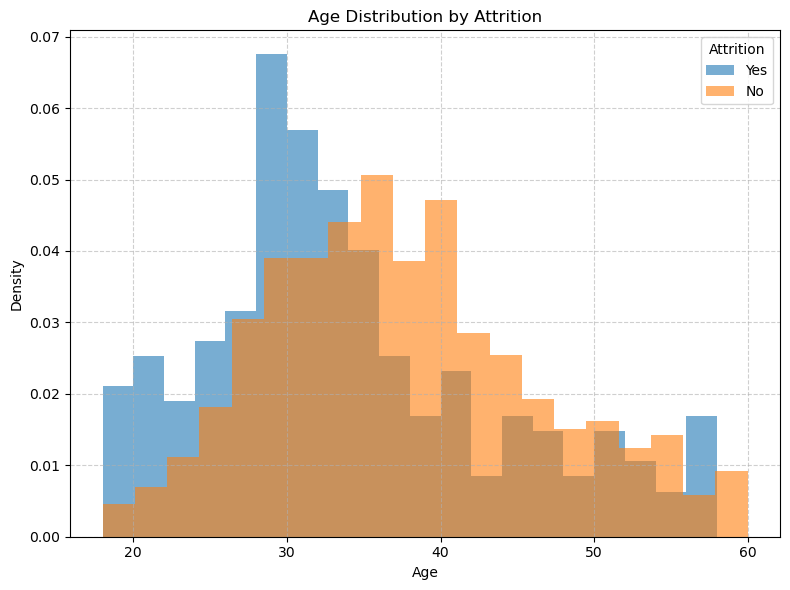

In [ ]:
# Analyze and Visualize Histogram with Variable Age 
bins=20
plt.figure(figsize=(8, 6))
for category in df['Attrition'].unique():
    subset = df[df['Attrition'] == category]['Age']
    plt.hist(subset, bins=bins, alpha=0.6, density=True, label=category)

plt.title(f'Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title= 'Attrition')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


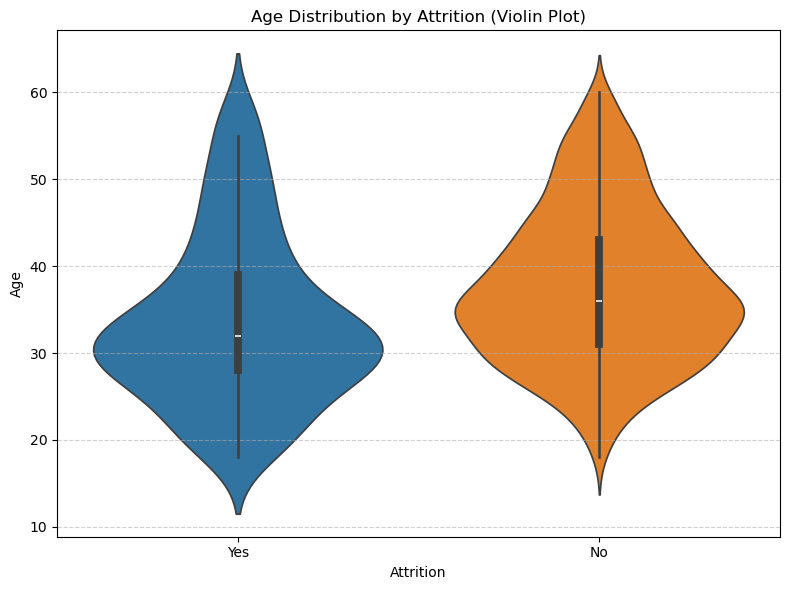

In [ ]:
# Analyze and Visualize ViolinPlot with Variable Age 
plt.figure(figsize=(8, 6))
sns.violinplot(x='Attrition', y='Age', data=df, hue='Attrition', dodge=False)
plt.title(f'Age Distribution by Attrition (Violin Plot)')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

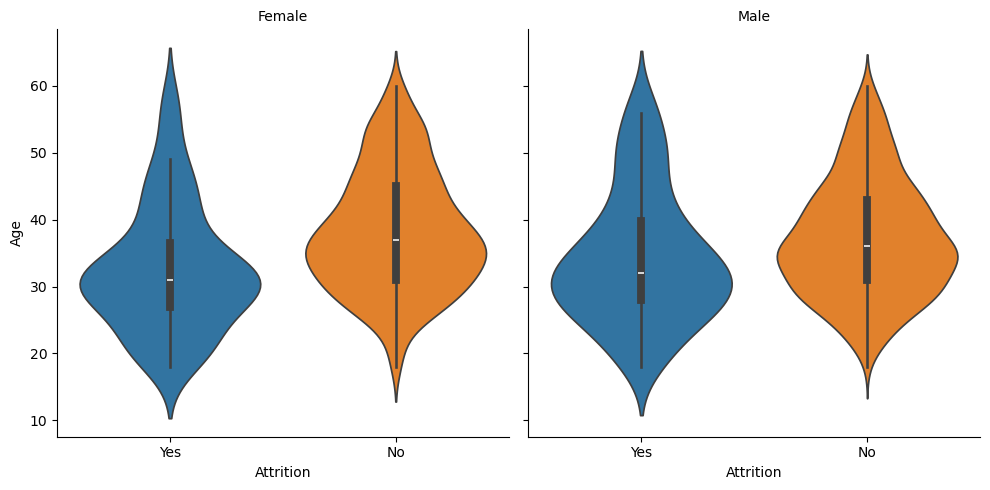

In [ ]:
# Analyze and Visualize ViolinPlot with Variable Age and Gender
col_wrap =2
plt.figure(figsize=(8, 6))
g = sns.catplot(x='Attrition', y='Age', col='Gender', data=df, hue='Attrition', kind='violin', col_wrap=col_wrap)
g.set_titles(col_template="{col_name}")
g.set_xlabels('Attrition')
g.set_ylabels('Age')
plt.tight_layout()
plt.show()